## Dataset Information

- This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France)
- Between December 2006 and November 2010 (47 months). 


### Columns Overview

1. Date: in format dd/mm/yyyy
2. Time: in format hh:mm:ss
3. global_active_power: The total active power consumed by the household at a given minute, measured
in kilowatts (kW). Active power is the productive power that performs work in the electrical system.
4. global_reactive_power: The total reactive power, measured in kilovolt-amperes reactive (kVAR). Unlike
active power, reactive power does not perform work, instead oscillating between the source and load. It
is essential for maintaining the voltage levels necessary for equipment operation
5. voltage: The average voltage level observed during the minute, measured in volts (V).This measurement
is indicative of the quality and stability of the electricity supplied to the household.
6. global_intensity: This represents the total current consumed by the household, measured in amperes
(A). It provides a direct measure of how intense the usage of electricity is at any given time
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner. 

### Used Libraries

In [1]:
import numpy as np

# Dataframes
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Splitting
from sklearn.model_selection import train_test_split

# Linear Model
from sklearn.linear_model import LinearRegression 

# Evaluation
import sklearn.metrics as metrics

# External Data
from holidays import France
from meteostat import Point, Daily
from datetime import datetime

## Data Loading

In [ ]:
# Convert .txt file to .csv (Comma Separated Values) -> by replacing the ";" with "," and change the extention to .csv

with open(r"C:\Users\Lenovo\Desktop\important code\projects-portfolio\electric_power_timeseries\data\household_power_consumption.txt", mode="r") as f:
    data = f.read()
    data = data.replace(";", ",")

with open(r"C:\Users\Lenovo\Desktop\important code\projects-portfolio\electric_power_timeseries\data\household_power_consumption.txt", mode="w") as f:
    f.write(data)
    

In [2]:
# Loading Dataframe

df = pd.read_csv(r"C:\Users\Lenovo\Desktop\important code\projects-portfolio\electric_power_timeseries\data\household_power_consumption.csv")
df.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

## Data Cleaning

In [3]:
df['dt'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index("dt")
df.drop(columns=["Date", "Time"], inplace=True)

In [4]:
# We have mixed datatypes so we get obj type for numeric data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    object        
 1   Global_reactive_power  object        
 2   Voltage                object        
 3   Global_intensity       object        
 4   Sub_metering_1         object        
 5   Sub_metering_2         object        
 6   Sub_metering_3         float64       
 7   dt                     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


In [5]:
# Compute Null before converting string to NaN
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dt                           0
dtype: int64

In [6]:
# remove strings in numeric columns
# convert string to NaN
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

In [7]:
# Columns Type fixed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   dt                     datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [8]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dt                           0
dtype: int64

In [9]:
print(f"Total size of the dataset: {df.size}")
print(f"Total number of null values: {df.isnull().sum().sum()}")
null_percentage = (df.isnull().sum().sum() // df.size) * 100   
print(f"Percentage of null values out of the dataset: {null_percentage}")

Total size of the dataset: 16602072
Total number of null values: 181853
Percentage of null values out of the dataset: 0


In [10]:
# Null percentage is so small, so we drop all rows with missing values
df.dropna(axis=0, inplace=True)
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dt                       0
dtype: int64

In [11]:
# No duplicated values
df.duplicated().sum()

np.int64(0)

# EDA

In [12]:
# Since the number of missing dates is small and doesn't present a gap, we will skip handling them 
# we are gonna skip them
All_dates =  pd.date_range(start='2006-12-16', end='2010-11-26').difference(df)
missing_dates = pd.date_range(start='2006-12-16', end='2010-11-26').difference(df.dt)
print(f"Missing Dates in the dataset: {missing_dates}")
print(f"there are {len(missing_dates)} missing dates out of {len(All_dates)} dates")

Missing Dates in the dataset: DatetimeIndex(['2006-12-16', '2007-04-29', '2007-04-30', '2009-06-14',
               '2009-06-15', '2010-01-13', '2010-01-14', '2010-03-21',
               '2010-08-18', '2010-08-19', '2010-08-20', '2010-08-21',
               '2010-08-22', '2010-09-26', '2010-09-27', '2010-09-28'],
              dtype='datetime64[ns]', freq=None)
there are 16 missing dates out of 1442 dates


In [13]:
df.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06   
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00   
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01   
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01   
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00   

                                  dt  
count                        2049280  
mean   2008-12-02 00:59:44.397740544  
min              2006-12-16 17:24:00  
25%              2007-12-10 05:37:45  
50%              2008-11-30 01:22:30  
75%              2009-11-23 20:31:15  
max              2010-11-26 21:02:00  
std                              NaN

### DataFrame Summary Overview and Anomalies

1. Period of the study
 - Start: **16-12-2006**
 - End: **26-11-2010** 
 - Duration: 4 years, 16 season

2. The study recorded every minute of the day with Q2 and mean have the same value **12:00**

3. Global Active Power 
 - IQR : from **0.308** (*25%* ) to  **1.528** (*75%*)
 - Max value is **11.122**, much higher than *75%* value -> potential presence of outliers

4. Global Reactive Power
 - IQR : from **0.048** (*25%* ) to **0.194** (*75%*)
 - Max value is **1.39**, much higher than *75%* value -> potential presence of outliers

5. Voltage
 - IQR : from **223.2** (*25%* ) to **254.15** (*75%*) 
 - Min and Max values are close to (*25%* ) and (*75%*) 
 - std is relatively high suggesting a good spread of the data

6. Global Intensity
 - IQR : from **1.4** (*25%* ) to **6.4** (*75%*)
 - Max value is **48.4**, much higher than *75%* value -> potential presence of outliers
 - std is relatively high suggesting high data variance

7. Sub Metering (1)
 - IQR range : **0.0** (*25%*) and **0.0** (*75%*)
 - Max value is **88.0**, much higher than *75%*
 - std **6.15** 
 - suggest extreme skewness and a variance 

8. Sub Metering (2)
 - IQR range : **0.0** (*25%*) and **1.0** (*75%*)
 - Max value is **80.0**, much higher than *75%*
 - std **5.82** 
 - suggest extreme skewness and a variance 

9. Sub Metering (3)
 - IQR range : **0.0** (*25%*) and **17.0** (*75%*) 
 - Max value is **31.0**, much higher than *75%*
 - std **8.43** 
 - suggest extreme skewness and a variance 


#### Next Step
- Further Investigation: dig into the reasons behind the anomalies
- Outlier Detection and Handling


## Visualization

#### Study Features Distribution

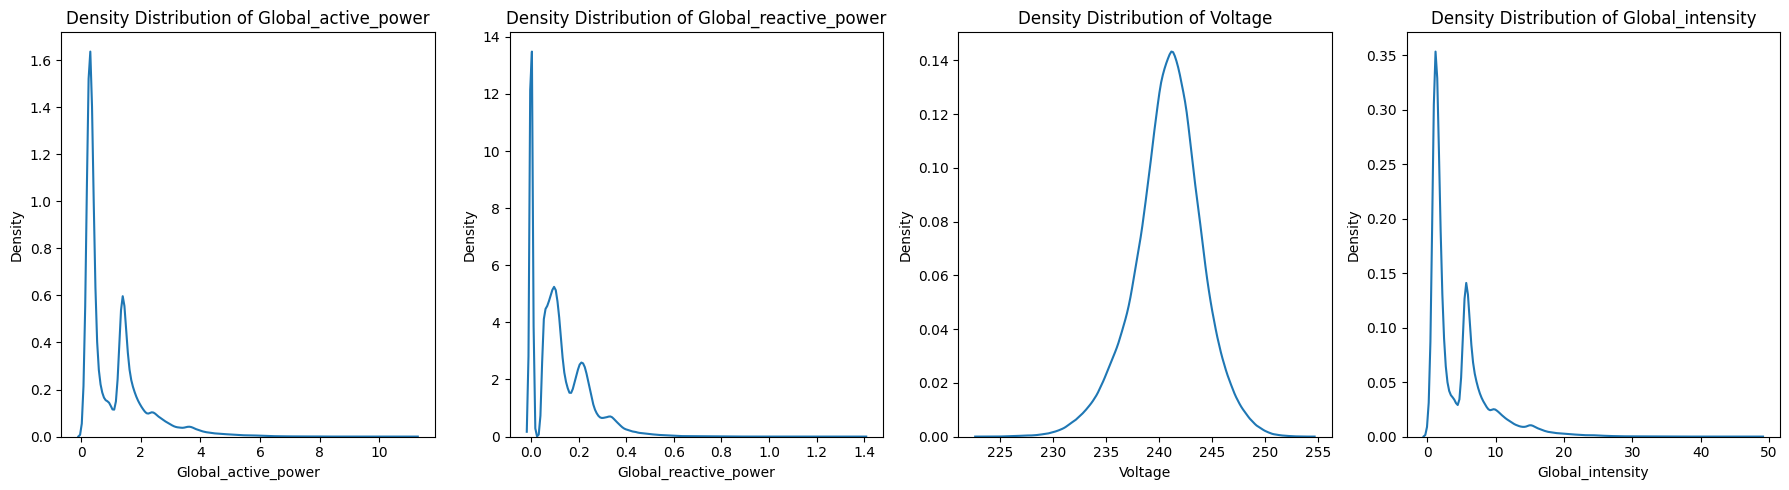

In [60]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

sns.kdeplot(df, x="Global_active_power", ax=axes[0])
axes[0].set_title("Density Distribution of Global_active_power")
sns.kdeplot(df, x="Global_reactive_power", ax=axes[1])
axes[1].set_title("Density Distribution of Global_reactive_power")
sns.kdeplot(df, x="Voltage", ax=axes[2])
axes[2].set_title("Density Distribution of Voltage")
sns.kdeplot(df, x="Global_intensity", ax=axes[3])
axes[3].set_title("Density Distribution of Global_intensity")

plt.tight_layout()
plt.show()

- we notice similar distribution shapes among Global_active_power (Target), Global_reactive_power and Global_intensity, which is expected
- After examining correlation we consider dropping one of the features.
- Voltage displays a near normal distribution

c:\Users\Lenovo\Desktop\important code\projects-portfolio\env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


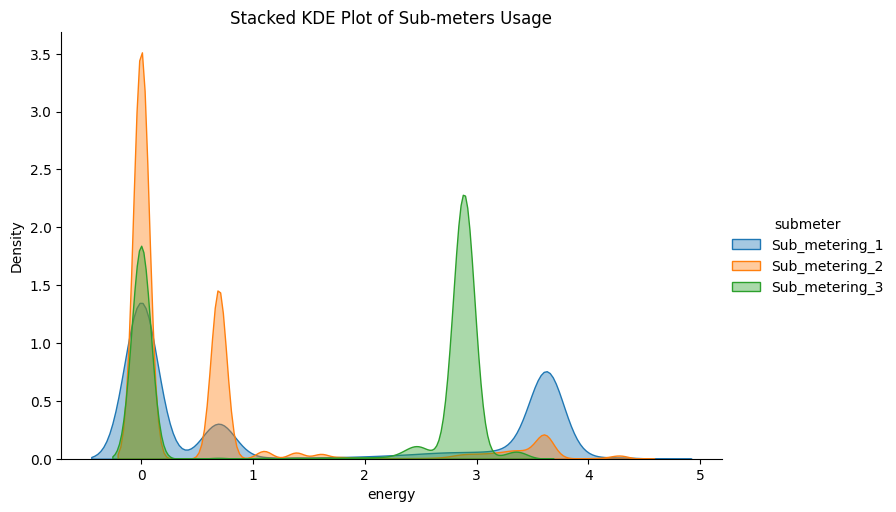

In [61]:
# Visualize Sub_meter distribution
# log transformed data for better presentation
sub_meter = df.melt(value_vars=["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"], value_name="energy", var_name="submeter")
sub_meter["energy"] = pd.to_numeric(sub_meter["energy"], errors="coerce")
sub_meter["energy"] = np.log(sub_meter["energy"])

g = sns.FacetGrid(sub_meter, hue="submeter", height=5, aspect=1.5)
g.map_dataframe(sns.kdeplot, x="energy", fill=True, alpha=0.4) # facetgrid allow to manually custom settings like transparency
g.add_legend()
plt.title("Stacked KDE Plot of Sub-meters Usage")
plt.show()

- All submeters concerntared around zero, indicating low or infrequent usage. 
- Sub_meter_1 (kitchen) shows a bimodal distribution with peaks at low and high energy usage.
- Sub_meter_2 (laundry room) also shows a bimodal both with no or low energy which is expected behaviour for laundry room.
- Sub_meter_3 (AC and water heater) exhibits a distinct bimodal with high density distribution peeks around 0 and 3, indicating most consumption of energy


#### Check for Seasonality and Checkpoints

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20260\4264130823.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[feature].resample('H').mean().plot(color="midnightblue", linewidth=0.5)


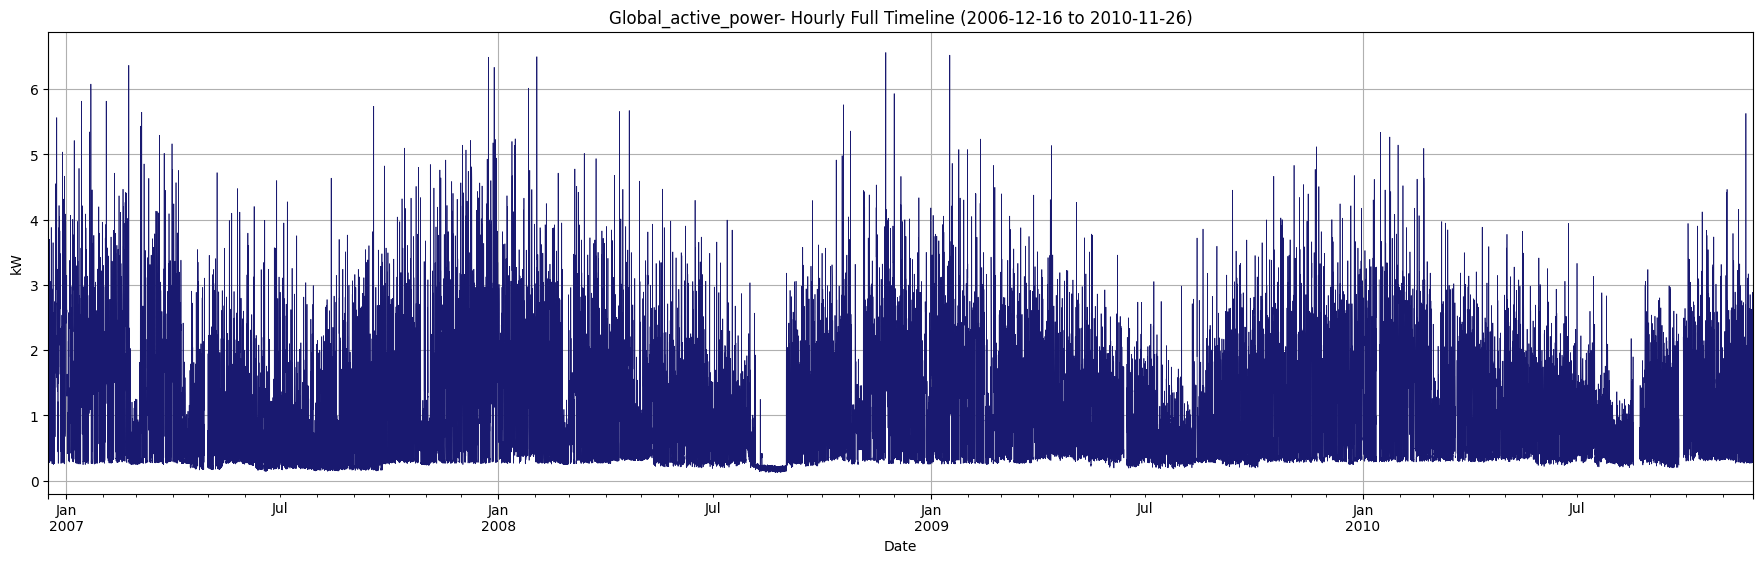

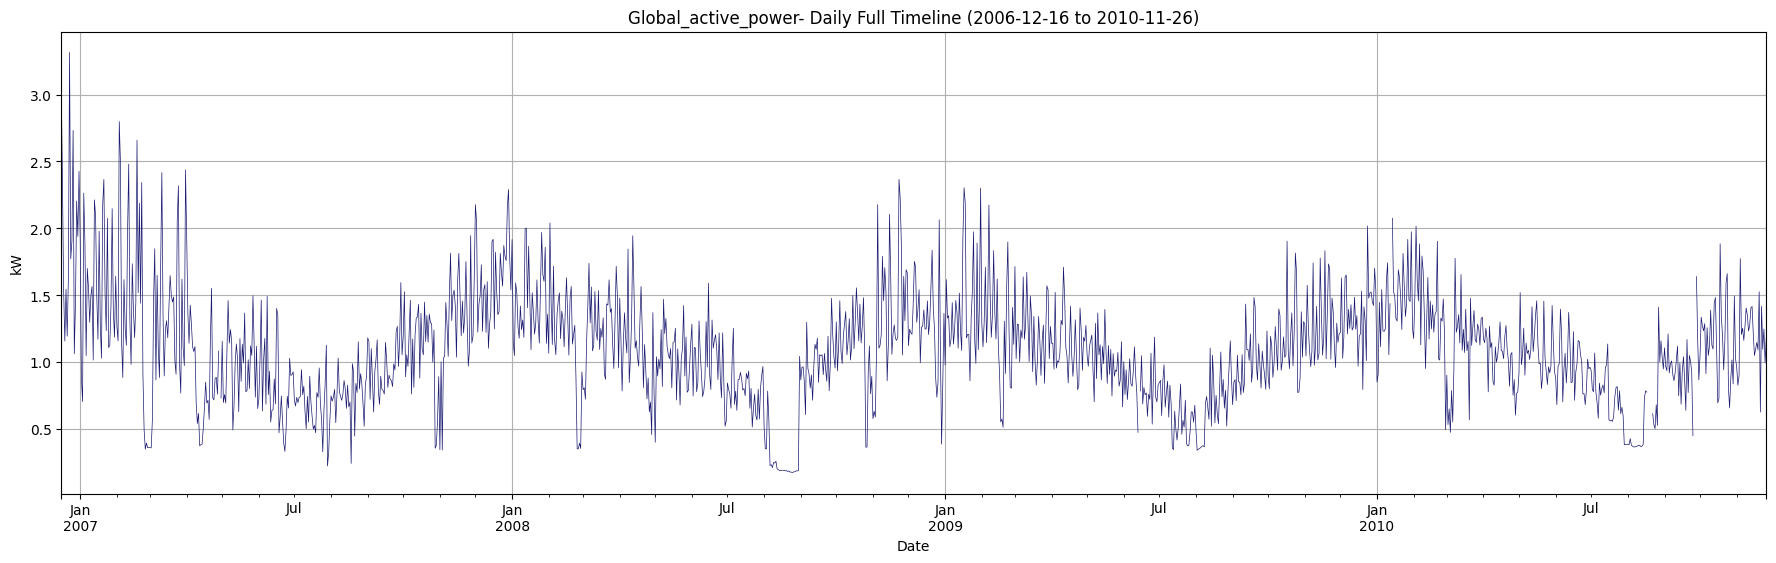

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20260\4264130823.py:22: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  df[feature].resample('w').mean().plot(color="midnightblue", linewidth=0.5)


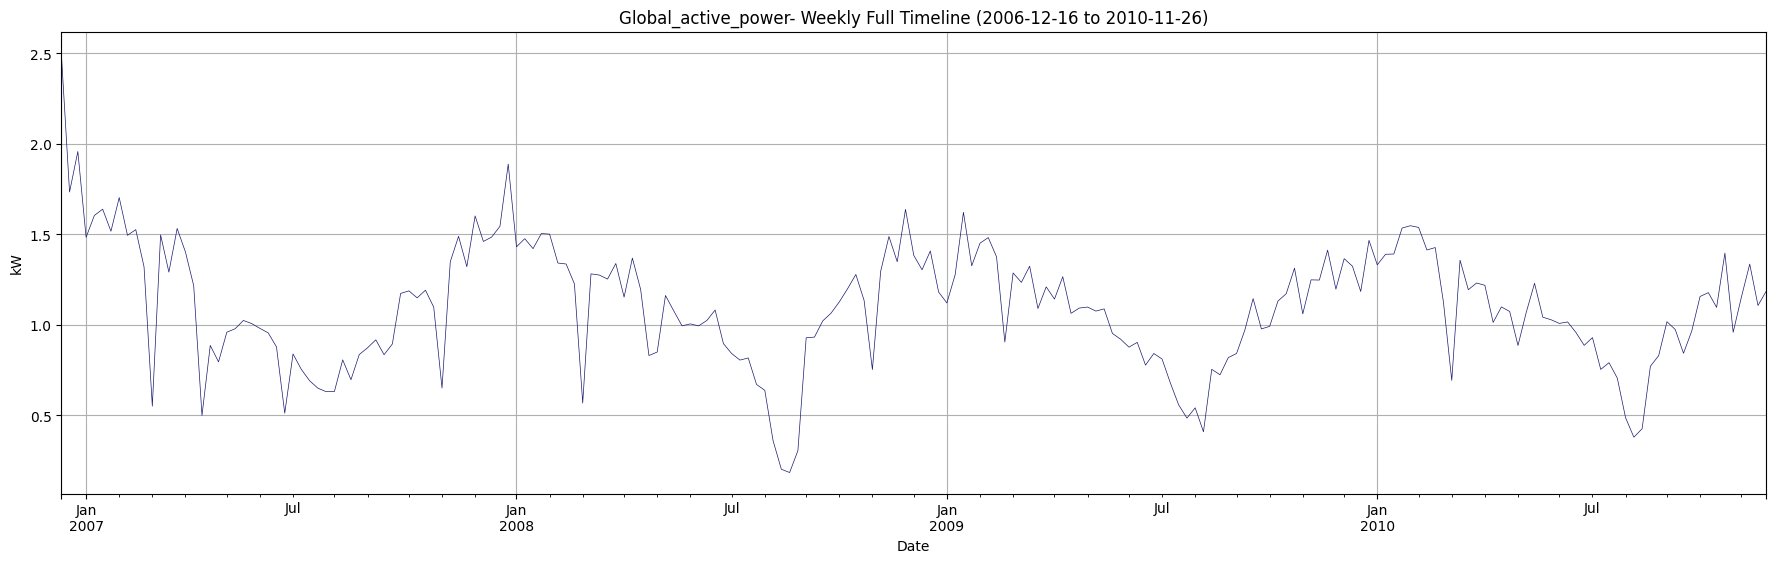

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20260\4264130823.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[feature].resample('M').mean().plot(color="midnightblue", linewidth=0.5)


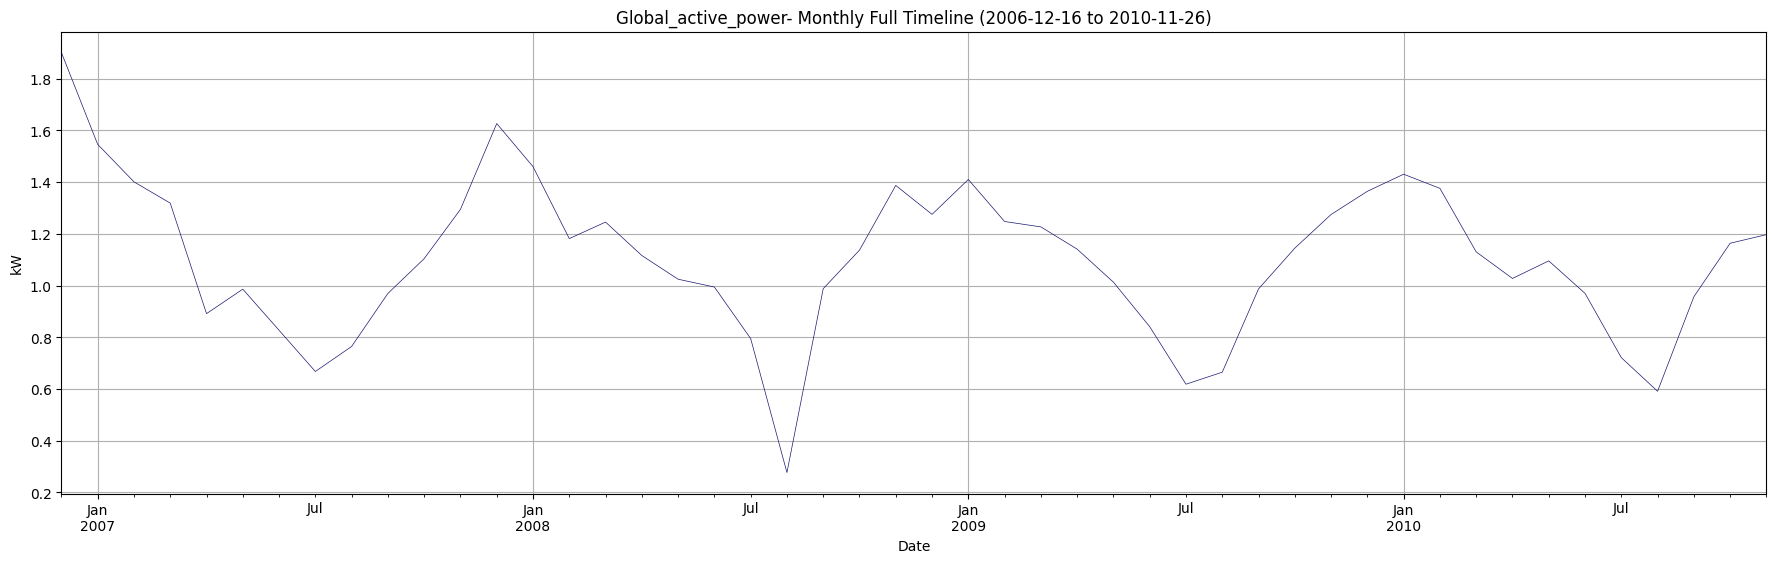

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20260\4264130823.py:38: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df[feature].resample('Q').mean().plot(color="midnightblue", linewidth=0.5)


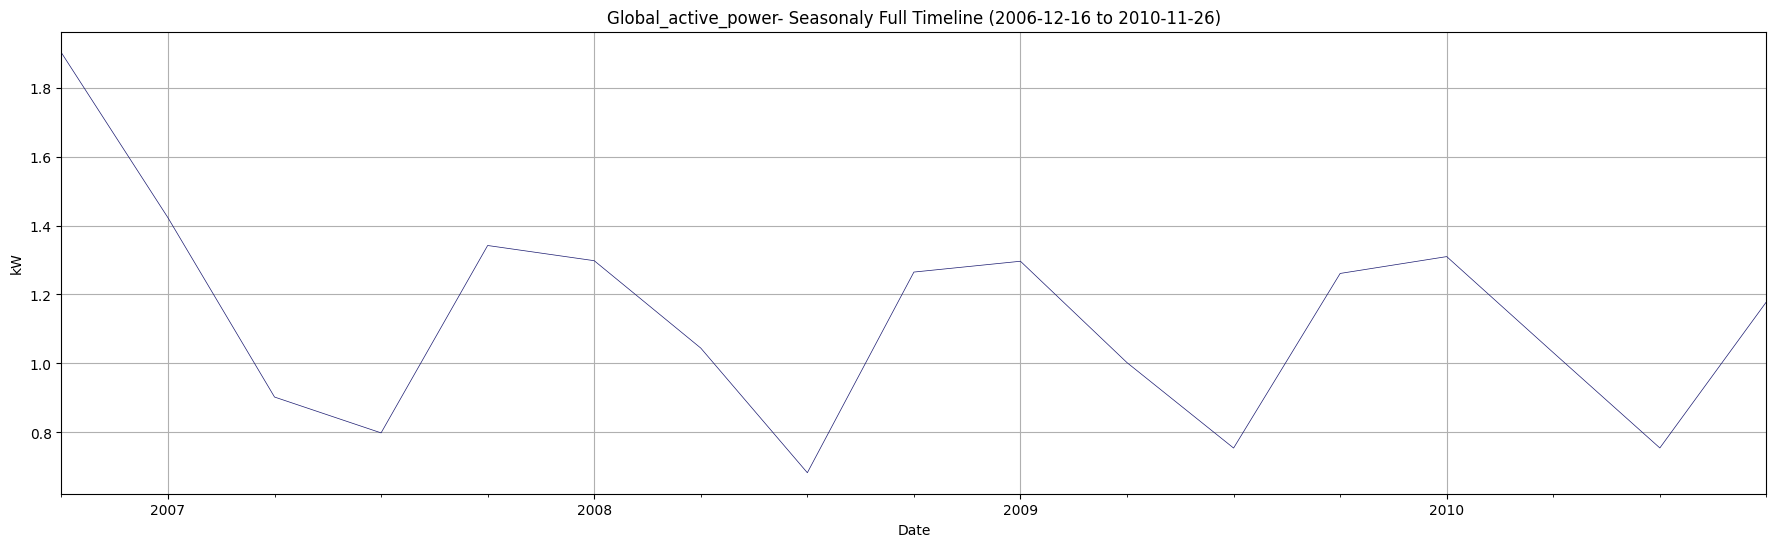

In [62]:
# Visualizing Global Active Power full timeline using different aggregation periods - Mean roll ups

feature = "Global_active_power"

plt.figure(figsize=(22, 6))
df[feature].resample('H').mean().plot(color="midnightblue", linewidth=0.5)
plt.title(f"{feature}- Hourly Full Timeline ({df.index.min().date()} to {df.index.max().date()})")
plt.xlabel('Date')
plt.ylabel('kW')
plt.grid(True)
plt.show()

plt.figure(figsize=(22, 6))
df[feature].resample('D').mean().plot(color="midnightblue", linewidth=0.5)
plt.title(f"{feature}- Daily Full Timeline ({df.index.min().date()} to {df.index.max().date()})")
plt.xlabel('Date')
plt.ylabel('kW')
plt.grid(True)
plt.show()

plt.figure(figsize=(22, 6))
df[feature].resample('w').mean().plot(color="midnightblue", linewidth=0.5)
plt.title(f"{feature}- Weekly Full Timeline ({df.index.min().date()} to {df.index.max().date()})")
plt.xlabel('Date')
plt.ylabel('kW')
plt.grid(True)
plt.show()

plt.figure(figsize=(22, 6))
df[feature].resample('M').mean().plot(color="midnightblue", linewidth=0.5)
plt.title(f"{feature}- Monthly Full Timeline ({df.index.min().date()} to {df.index.max().date()})")
plt.xlabel('Date')
plt.ylabel('kW')
plt.grid(True)
plt.show()

plt.figure(figsize=(22, 6))
df[feature].resample('Q').mean().plot(color="midnightblue", linewidth=0.5)
plt.title(f"{feature}- Seasonaly Full Timeline ({df.index.min().date()} to {df.index.max().date()})")
plt.xlabel('Date')
plt.ylabel('kW')
plt.grid(True)
plt.show()

the plot indicates a clear **seasonality** pattern over the years. Peaks in consumption are observed during **winter months** (around Jan), aligning with heating demands, as we saw that the most usage of sub_meters was submeter_3 (AC and Water heater), while consumption drops during **summer months** (June-July) due to milder termperatures reducing heat needs and a better time for going out.

Additionally, a **zig-zag** pattern over short periods suggests **weekdays** and **weekends** cycle.

Notably, Aug 2008 and Aug 2010 shows a clear drops to almost no consumption, potentionally indicating vacation period, absences or special events

These observation guide our FE, consider the importance of creating features like months, quarters, days

p.s: I noticed that there is no changing point as the usage routine is cyclic and consistent

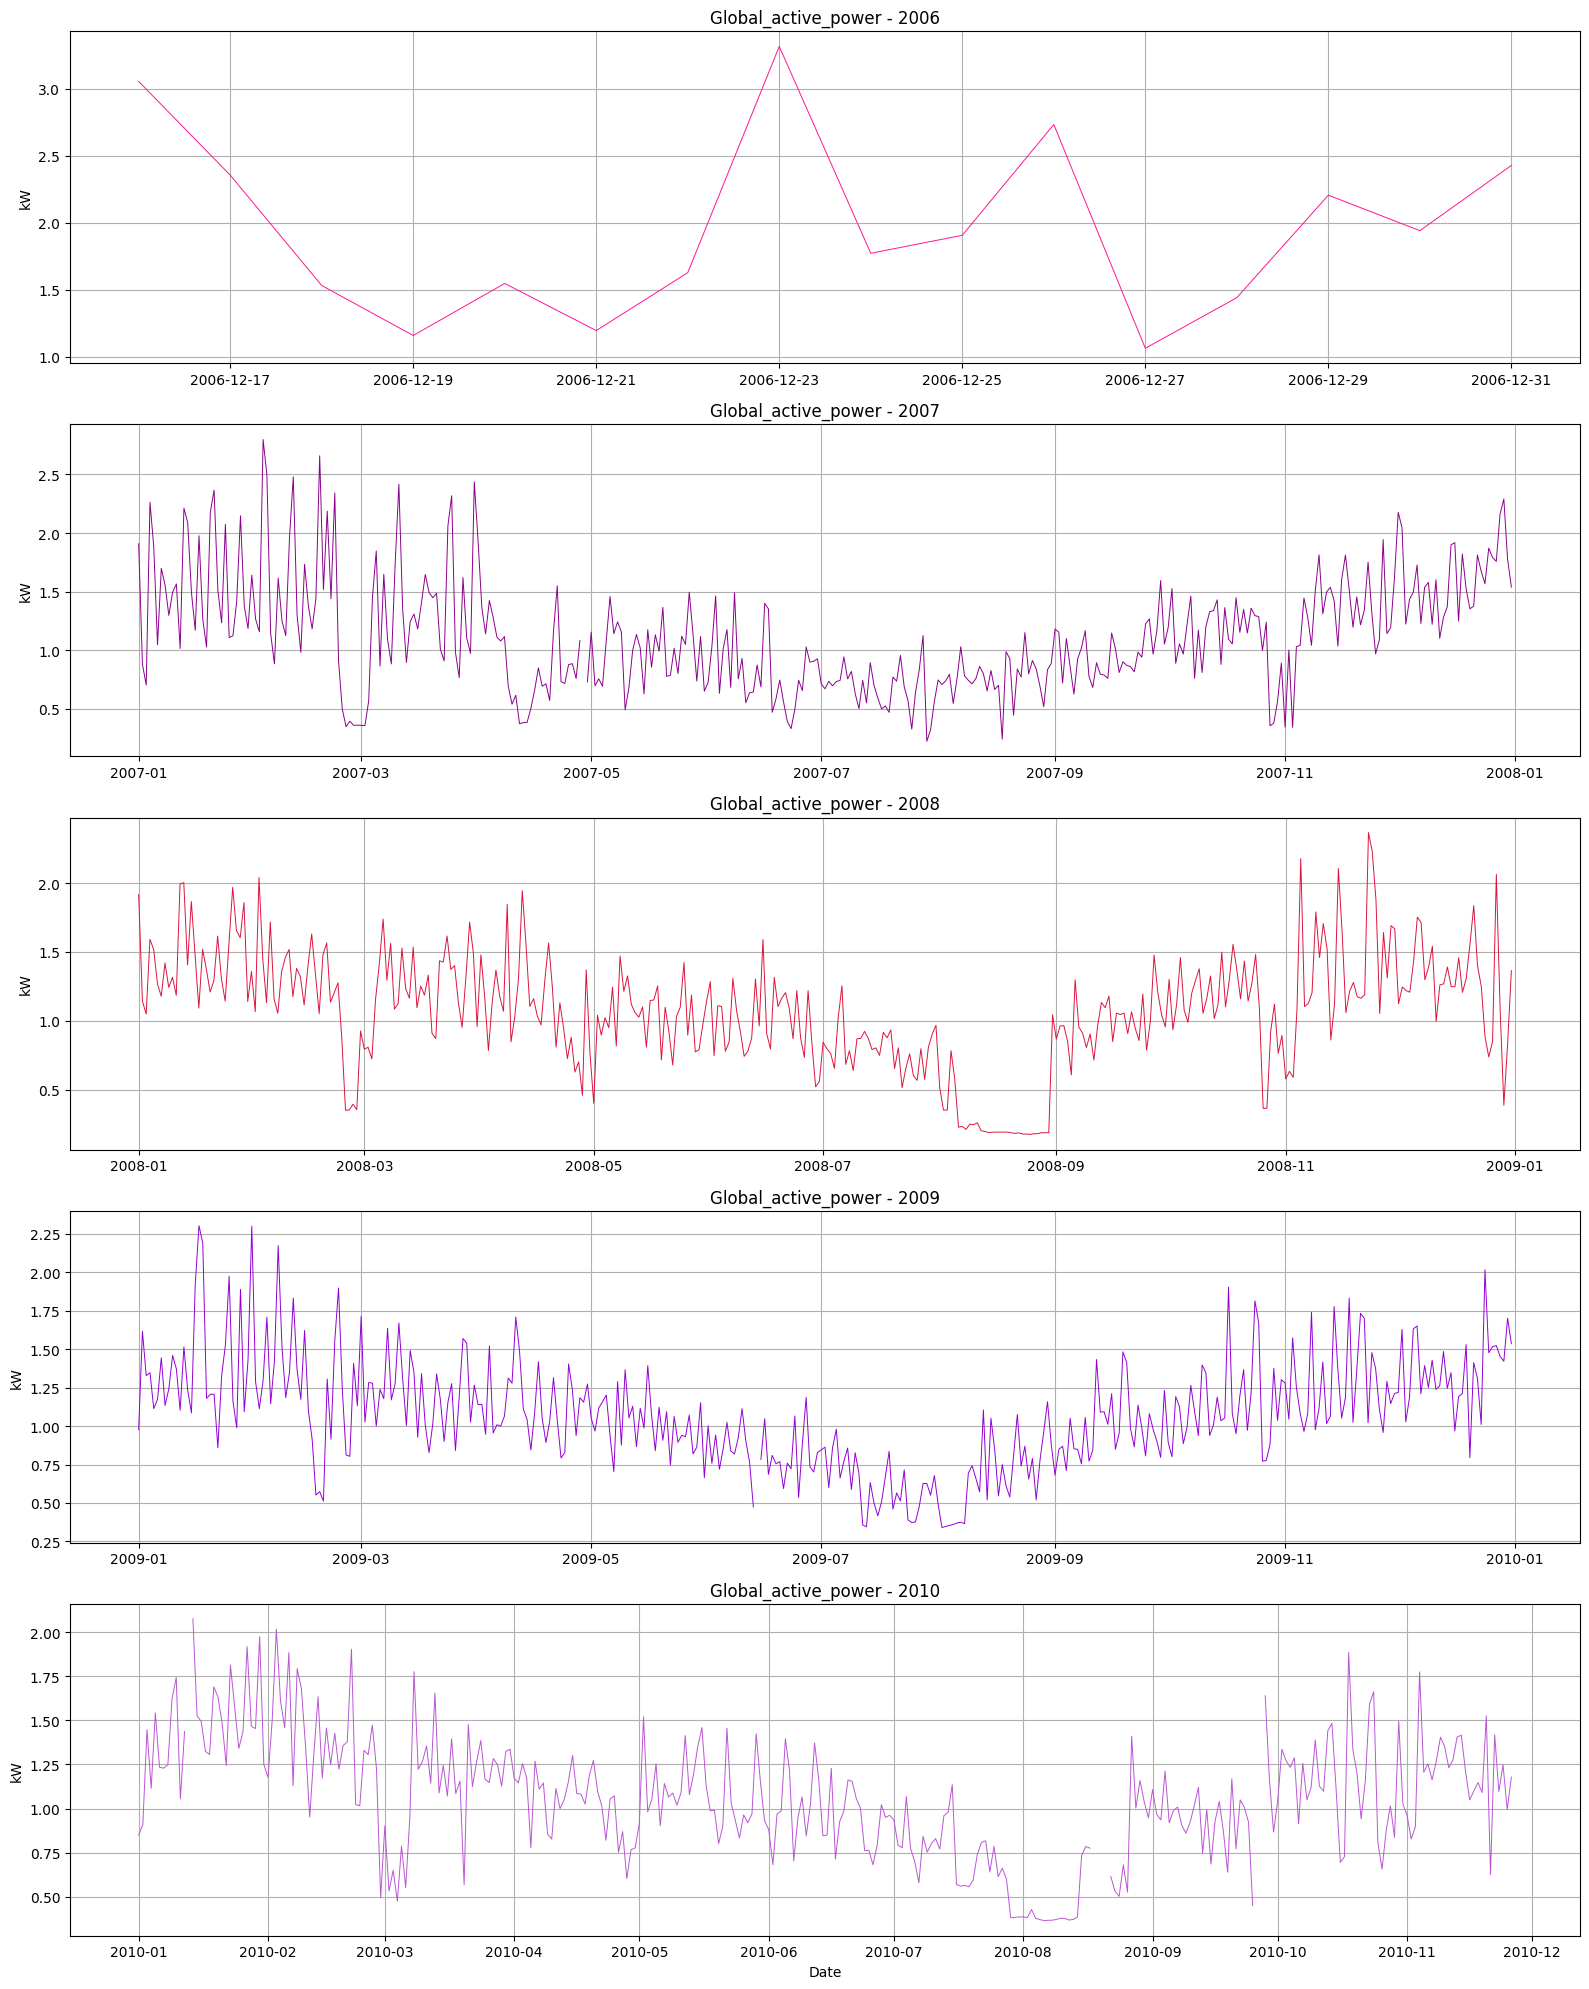

In [63]:
# visualize global active power for each year - days aggregation

daily_data = df['Global_active_power'].resample('D').mean()
daily_data = daily_data.to_frame()
daily_data['Year'] = daily_data.index.year
years = daily_data['Year'].unique()

colors = ["deeppink", "darkmagenta", "crimson", "darkviolet", "mediumorchid"]
fig, axes = plt.subplots(len(years), 1, figsize=(16, 4 * len(years)), sharex=False)
for i, year in enumerate(years):
    year_data = daily_data[daily_data['Year'] == year]
    axes[i].plot(year_data.index, year_data['Global_active_power'], color=colors[i], linewidth=0.7)
    axes[i].set_title(f"{'Global_active_power'} - {year}")
    axes[i].set_ylabel('kW')
    axes[i].grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

going over the details of each year, we observe that the highest peeks and drops going around the same times over the year indicating a specific routines, events or holidays. For example we see a very obvious peek at the end of years 2007, 2008 and 2009 which might be christmas gatherings or holiday celebration.

#### Features Correlation

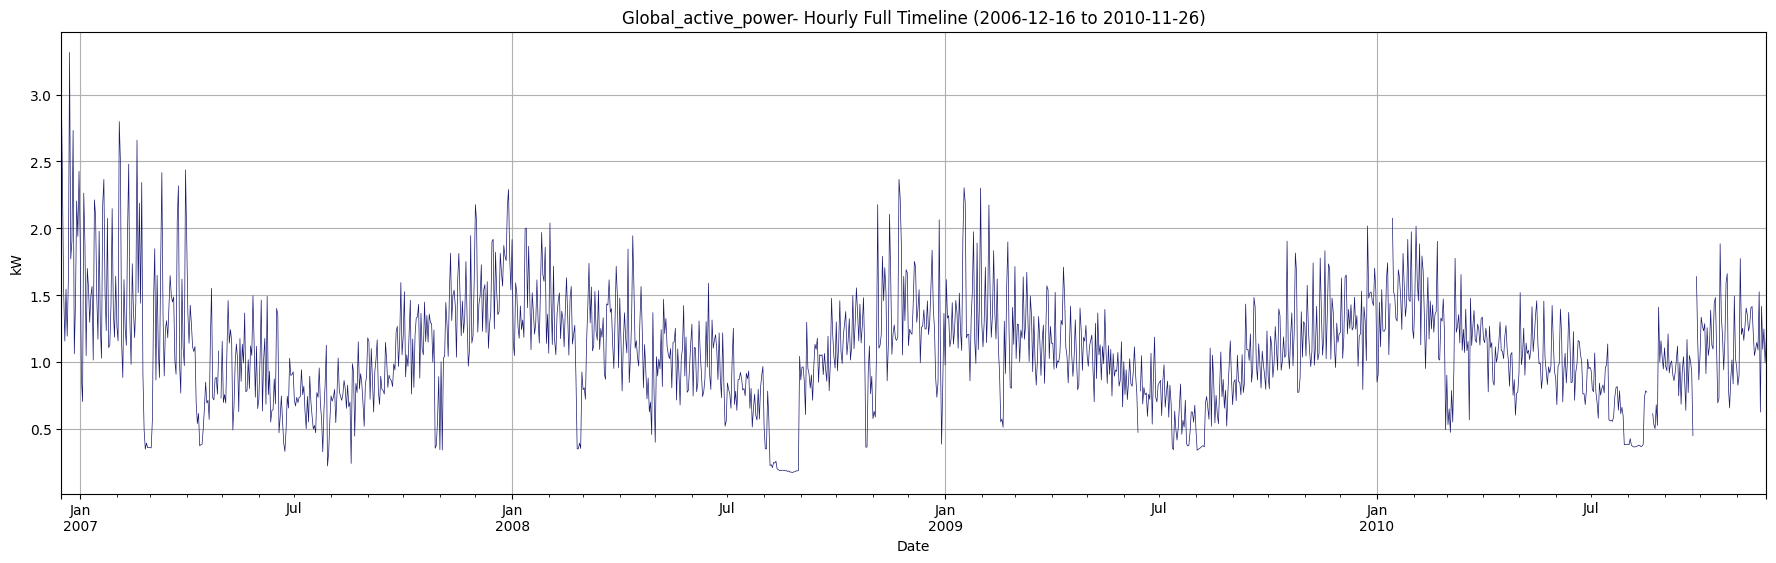

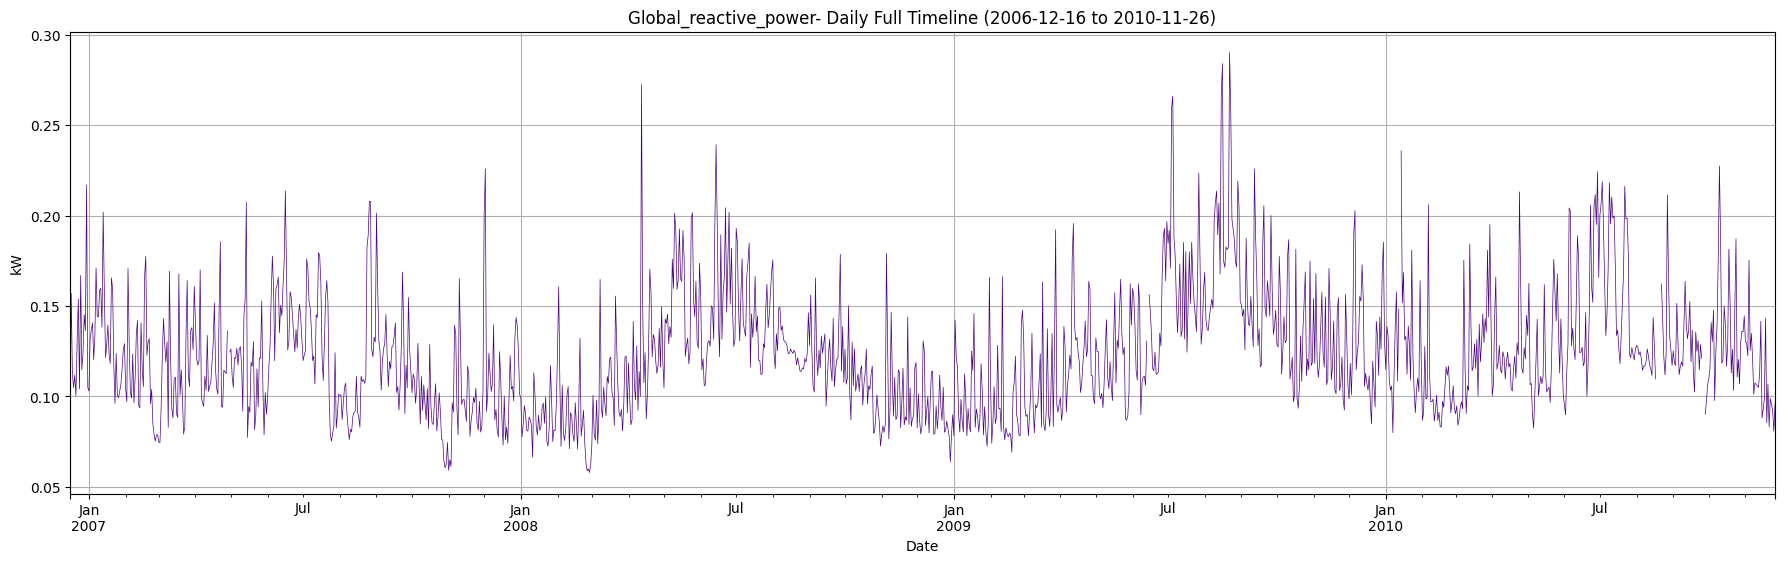

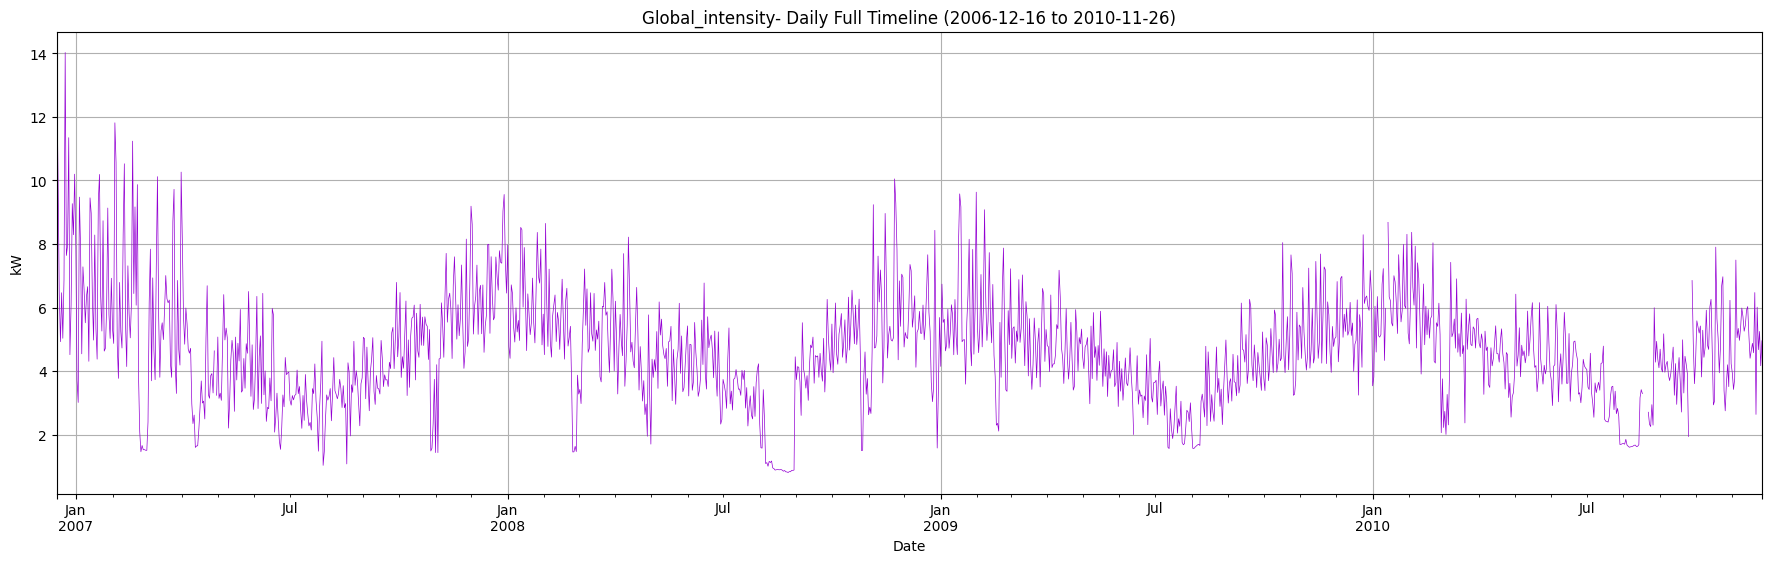

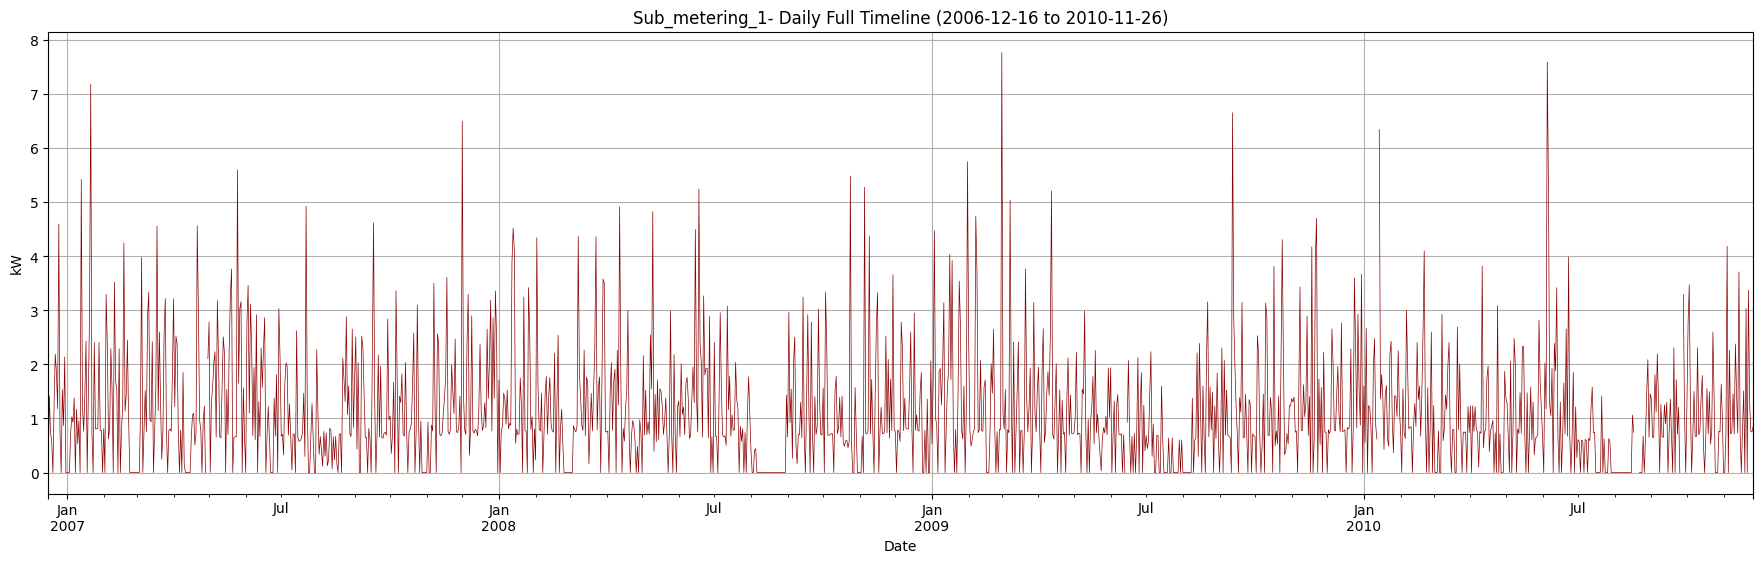

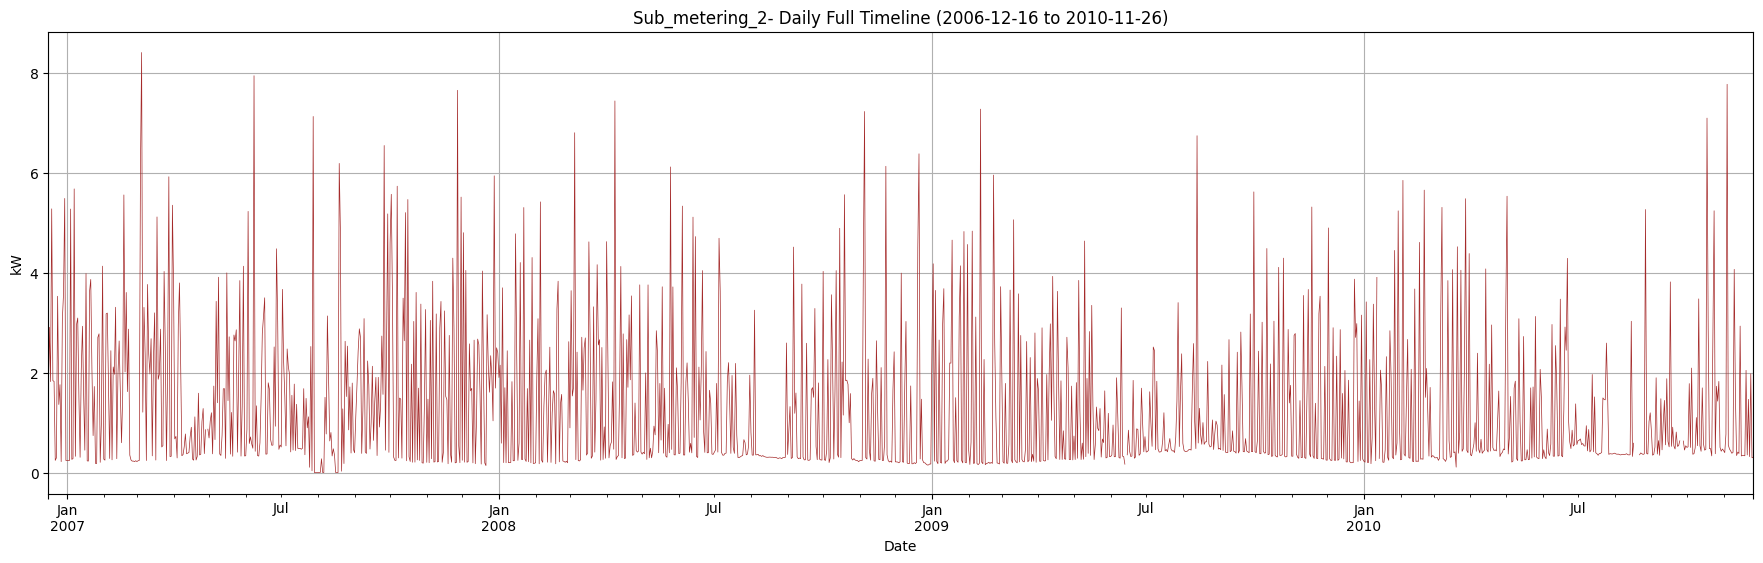

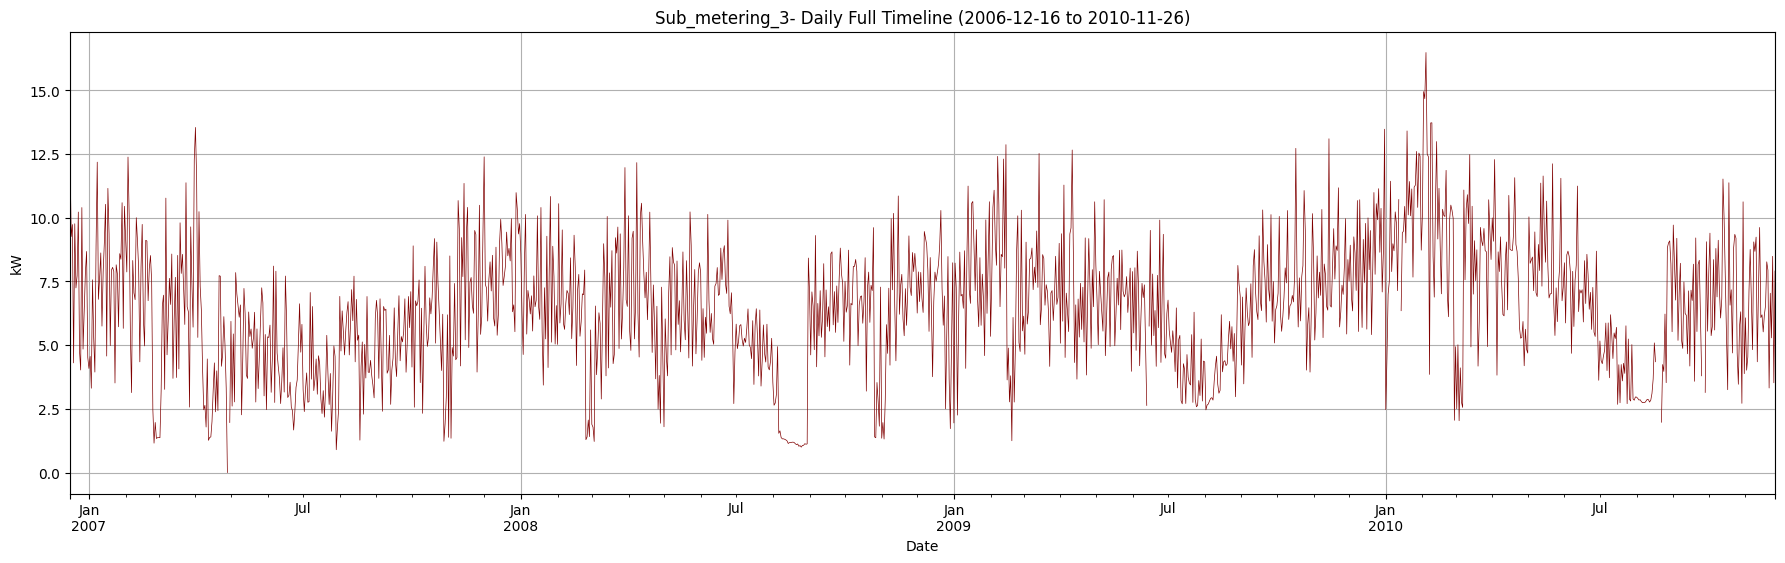

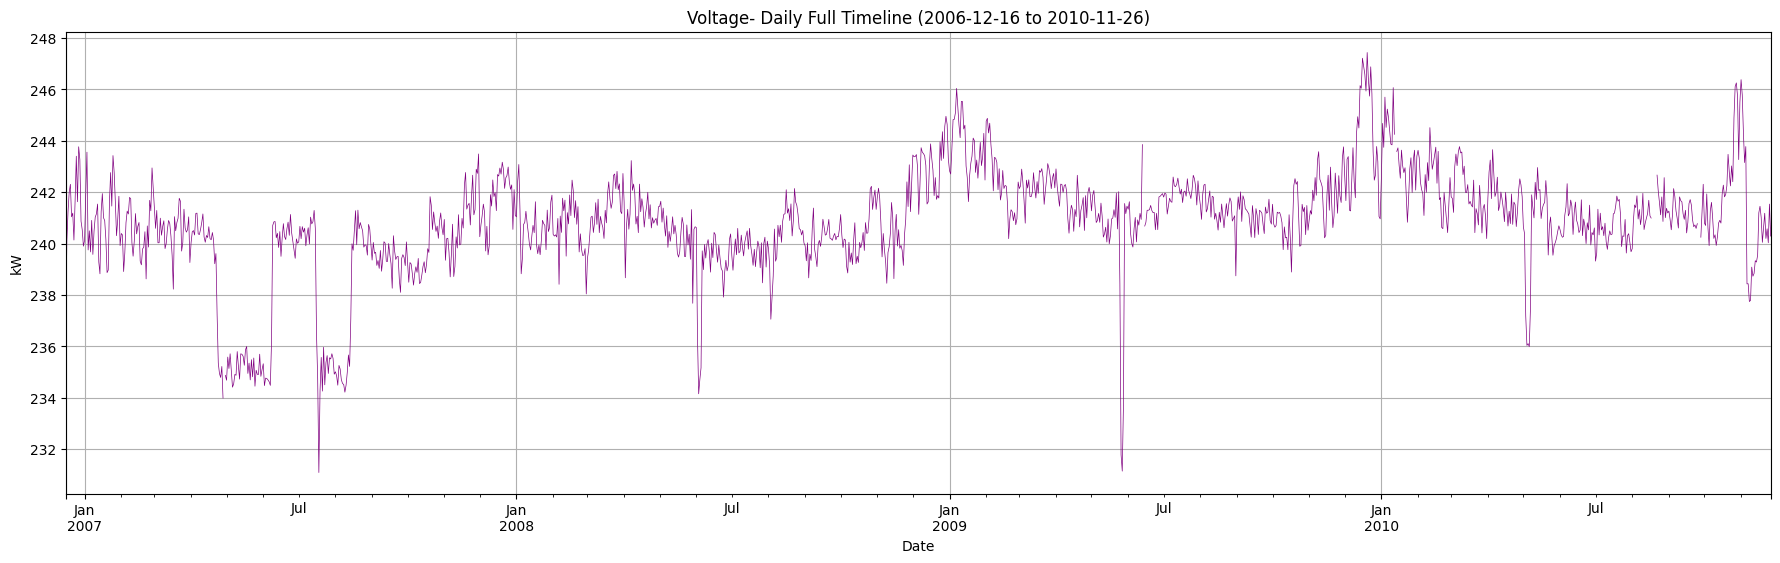

In [98]:
# Compare the behaviour of each feature along with the target in separate plots and days aggregation for clearer vision


feature = "Global_active_power"
plt.figure(figsize=(22, 6))
df[feature].resample('D').mean().plot(color="midnightblue", linewidth=0.5)
plt.title(f"{feature}- Hourly Full Timeline ({df.index.min().date()} to {df.index.max().date()})")
plt.xlabel('Date')
plt.ylabel('kW')
plt.grid(True)
plt.show()

feature = "Global_reactive_power"
plt.figure(figsize=(22, 6))
df[feature].resample('D').mean().plot(color="indigo", linewidth=0.5)
plt.title(f"{feature}- Daily Full Timeline ({df.index.min().date()} to {df.index.max().date()})")
plt.xlabel('Date')
plt.ylabel('kW')
plt.grid(True)
plt.show()

feature = "Global_intensity"
plt.figure(figsize=(22, 6))
df[feature].resample('D').mean().plot(color="darkviolet", linewidth=0.5)
plt.title(f"{feature}- Daily Full Timeline ({df.index.min().date()} to {df.index.max().date()})")
plt.xlabel('Date')
plt.ylabel('kW')
plt.grid(True)
plt.show()

feature = "Sub_metering_1"
plt.figure(figsize=(22, 6))
df[feature].resample('D').mean().plot(color="darkred", linewidth=0.5)
plt.title(f"{feature}- Daily Full Timeline ({df.index.min().date()} to {df.index.max().date()})")
plt.xlabel('Date')
plt.ylabel('kW')
plt.grid(True)
plt.show()

feature = "Sub_metering_2"
plt.figure(figsize=(22, 6))
df[feature].resample('D').mean().plot(color="brown", linewidth=0.5)
plt.title(f"{feature}- Daily Full Timeline ({df.index.min().date()} to {df.index.max().date()})")
plt.xlabel('Date')
plt.ylabel('kW')
plt.grid(True)
plt.show()

feature = "Sub_metering_3"
plt.figure(figsize=(22, 6))
df[feature].resample('D').mean().plot(color="maroon", linewidth=0.5)
plt.title(f"{feature}- Daily Full Timeline ({df.index.min().date()} to {df.index.max().date()})")
plt.xlabel('Date')
plt.ylabel('kW')
plt.grid(True)
plt.show()

feature = "Voltage"
plt.figure(figsize=(22, 6))
df[feature].resample('D').mean().plot(color="purple", linewidth=0.5)
plt.title(f"{feature}- Daily Full Timeline ({df.index.min().date()} to {df.index.max().date()})")
plt.xlabel('Date')
plt.ylabel('kW')
plt.grid(True)
plt.show()

- As expected, there's a clear negative correlation between Global Active Power and Global Reactive Power, which makes sense given how they behave oppositely.

- In August 2008 and 2010, we notice zero usage in Sub_meter_1 and Sub_meter_2, and almost no usage in Sub_meter_3 and Global Intensity. This definitely points to the household being completely absent, maybe on vacation or away for a long period.

- Throughout the timeline, Sub_meter_1 (kitchen) and Sub_meter_2 (laundry room) show a steady and low usage, which reflects their nature — they are used routinely but not intensively. So, they probably don’t have much correlation with the overall energy consumption.

- On the other hand, Sub_meter_3 (AC and Water Heater) is highly correlated with Global Active Power. It’s clear that this meter drives most of the variations in electricity usage.

- As for Voltage, it seems to have no clear correlation with consumption, which is expected since voltage is usually stable and not directly influenced by how much electricity the household is using. We also notice drops in May, June and Aug of 2007 and this maybe due some regulations from the electricity company. 



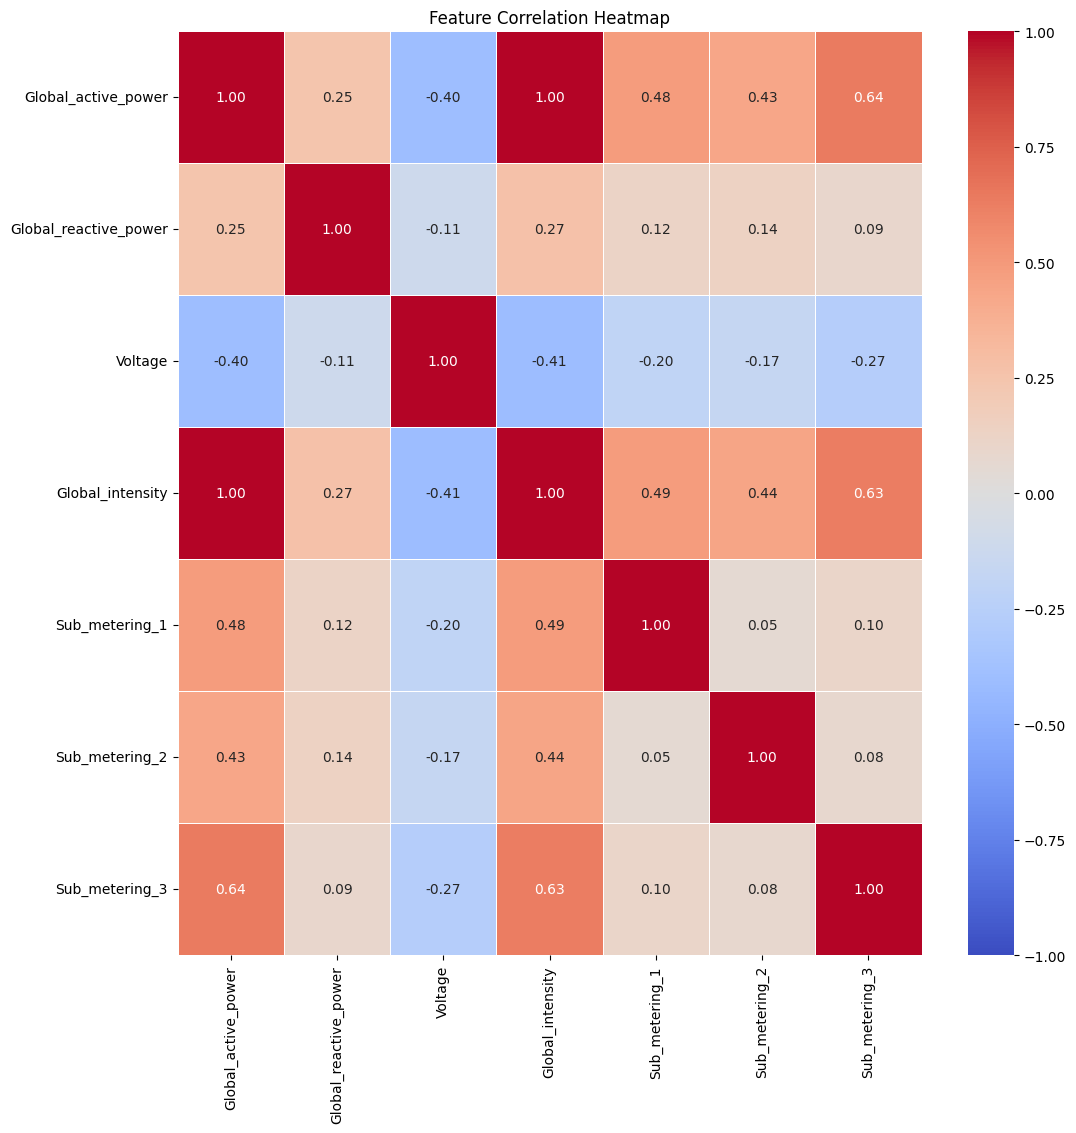

In [65]:
# Plot correlation heatmap

corr_matrix = df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

**Highest correlation is with sub_metering_3 as expected**
- we might drop Global_reactive_power due to its low correlation and Global_intensity for the potential of redunduncy
- Next, I’ll run a quick ML model to test how much the remaining features contribute to prediction and see if any others can be safely removed.

#### Check feature importance

In [131]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    # print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))

Regression Report: 
explained_variance:  0.9986
r2:  0.9986
MAE:  0.0258
MSE:  0.0016
                 Feature  Importance
1       Global_intensity    0.238038
0  Global_reactive_power    0.175787
2                Voltage    0.004453
5         Sub_metering_3    0.002176
4         Sub_metering_2    0.000442
3         Sub_metering_1    0.000329


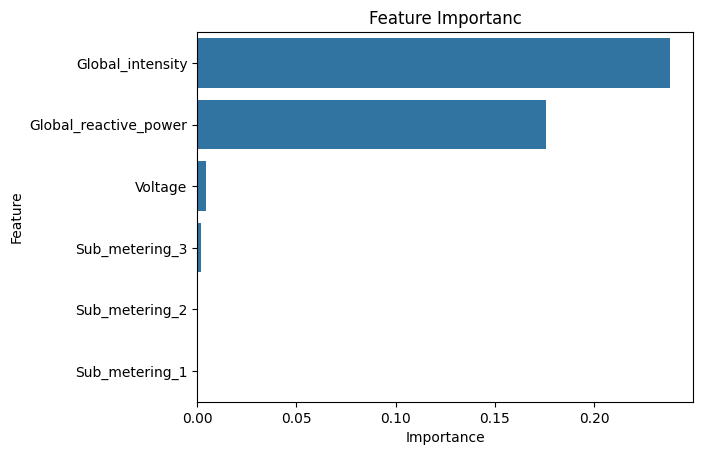

In [135]:
features = ["Global_reactive_power", "Global_intensity", "Voltage", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]
X = df[features]
y = df["Global_active_power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("Regression Report: ")
regression_results(y_true=y_test, y_pred=y_pred)

importances = lr_model.coef_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": abs(importances)})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)

sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importanc")
plt.show()


Global_reactive_power and Global_intensity are probably derived from the target

Regression Report: 
explained_variance:  0.7423
r2:  0.7423
MAE:  0.3663
MSE:  0.2896
                 Feature  Importance
0  Global_reactive_power    0.867221
4         Sub_metering_3    0.066809
2         Sub_metering_1    0.064765
3         Sub_metering_2    0.061398
1                Voltage    0.037839


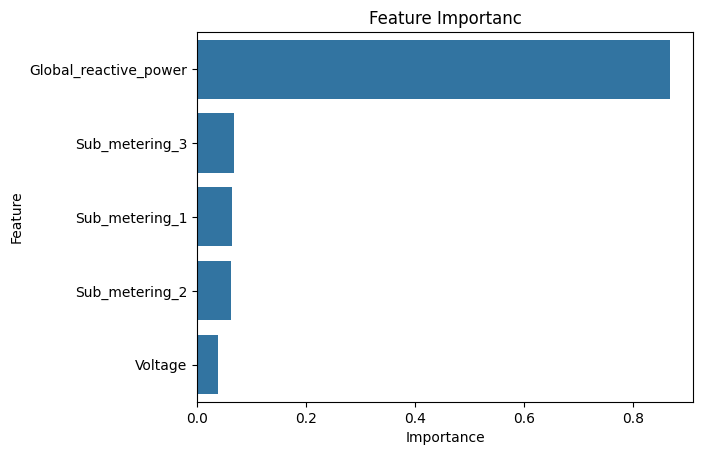

In [134]:
features = ["Global_reactive_power",  "Voltage", "Sub_metering_1", "Sub_metering_2","Sub_metering_3"]
X = df[features]
y = df["Global_active_power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("Regression Report: ")
regression_results(y_true=y_test, y_pred=y_pred)

importances = lr_model.coef_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": abs(importances)})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)

sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importanc")
plt.show()


removing "Sub_metering_1", "Sub_metering_2",  didnt affect the performance

Regression Report: 
explained_variance:  0.4626
mean_squared_log_error:  0.0886
r2:  0.4626
MAE:  0.5236
MSE:  0.604
          Feature  Importance
0         Voltage    0.080338
1  Sub_metering_3    0.071741


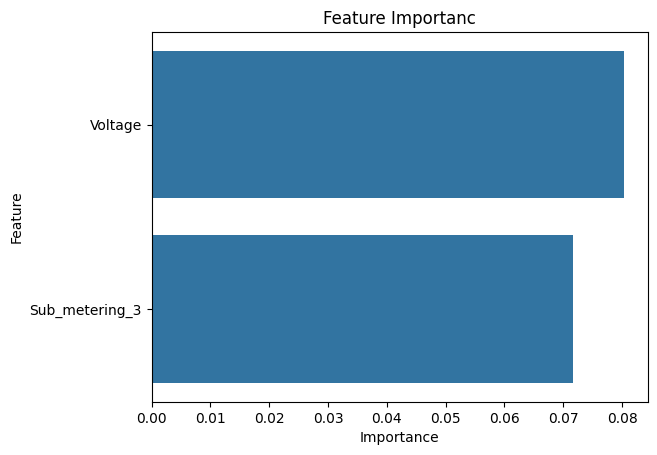

In [81]:
features = ["Voltage", "Sub_metering_3"]
X = df[features]
y = df["Global_active_power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("Regression Report: ")
regression_results(y_true=y_test, y_pred=y_pred)

importances = lr_model.coef_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": abs(importances)})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)

sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importanc")
plt.show()


# Feature Engineering 

1. Global_intensity has a 100% correlation with the target so it will cause data leakage (definitely drop)
2. Will study with and without (Global_reactive_power, sub_metering_1 and sub_metering_3)
3. FE (rolling, lag, (days, months, quarters, daytime))
4. Test with LinearRegression

In [12]:
# Copy of the data to do FE on
df_copy = df.copy()
df_copy['dt'] = pd.to_datetime(df_copy['dt'])
df_copy.set_index('dt', inplace=True)

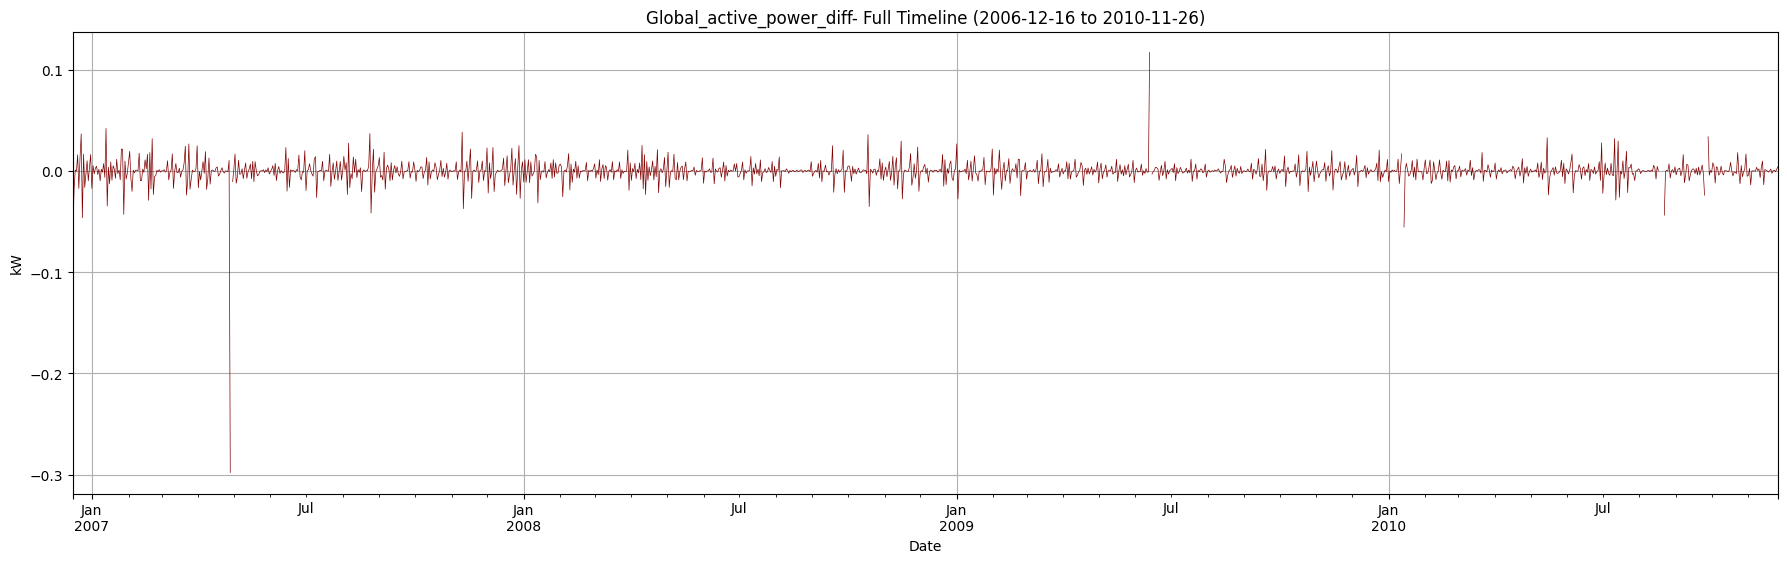

In [13]:
# Handle Seasonality
# Seasonal differencing
df_copy["Global_active_power_diff"] = df_copy["Global_active_power"].diff(periods=12)

feature = "Global_active_power_diff"
plt.figure(figsize=(22, 6))
df_copy[feature].resample('D').mean().plot(color="maroon", linewidth=0.5)
plt.title(f"{feature}- Full Timeline ({df_copy.index.min().date()} to {df_copy.index.max().date()})")
plt.xlabel('Date')
plt.ylabel('kW')
plt.grid(True)
plt.show()

We now can see how the seasonality is totally removed

In [ ]:
# # ensure removing seasonality with ADF test

# from statsmodels.tsa.stattools import adfuller

# def adf_test(series):
#     """Using an ADF test to determine if a series is stationary"""
#     test_results = adfuller(series)
#     print('ADF Statistic: ', test_results[0])
#     print('P-Value: ', test_results[1])
#     print('Critical Values:')
#     for thres, adf_stat in test_results[4].items():
#         print('\t%s: %.2f' % (thres, adf_stat))

# df_copy["Global_active_power_diff"] = df_copy["Global_active_power_diff"].astype('float32')
# adf_test(df_copy["Global_active_power_diff"].dropna())


MemoryError: Unable to allocate 844. MiB for an array with shape (54, 2049123) and data type float64

**I don't have enough resources for the ADF test**

In [14]:
# Drop Global_intensity Column
df_copy.drop(columns="Global_intensity", inplace=True)

In [15]:
# Log transform Global_reactive_power and submeters to handle skewness
df_copy['Global_reactive_power'] = np.log1p(df_copy['Global_reactive_power'])
df_copy['Sub_metering_1'] = np.log1p(df_copy['Sub_metering_1'])
df_copy['Sub_metering_2'] = np.log1p(df_copy['Sub_metering_2'])
df_copy['Sub_metering_3'] = np.log1p(df_copy['Sub_metering_3'])

Study Feature importance after transforming data

Regression Report: 
explained_variance:  0.6745
mean_squared_log_error:  0.0676
r2:  0.6745
MAE:  0.4202
MSE:  0.3643
                 Feature  Importance
2         Sub_metering_1    0.644986
3         Sub_metering_2    0.429872
4         Sub_metering_3    0.411165
0  Global_reactive_power    0.368071
1                Voltage    0.045109


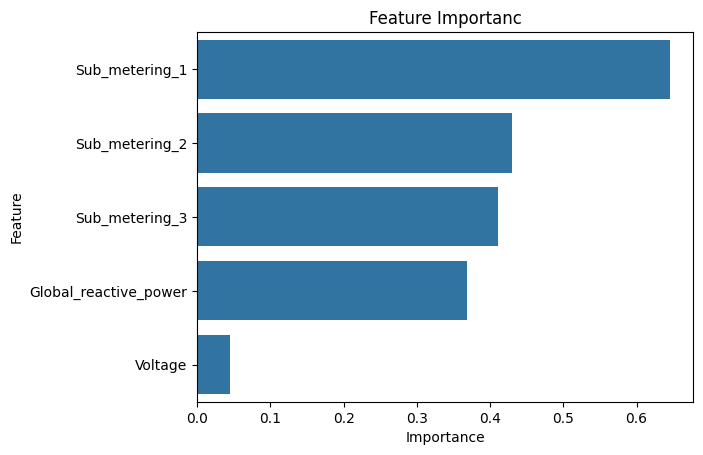

In [ ]:
features = ["Global_reactive_power",  "Voltage", "Sub_metering_1", "Sub_metering_2","Sub_metering_3"]
X = df_copy[features]
y = df_copy["Global_active_power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("Regression Report: ")
regression_results(y_true=y_test, y_pred=y_pred)

importances = lr_model.coef_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": abs(importances)})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)

sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importanc")
plt.show()


"The performance decreased from 74% to 67%, which is acceptable because the model is now less overfitted and will generalize better to unseen data."

In [17]:
# column of daytime

def add_daytime_feature(data, new_feature="daytime"):
    def map_daytime(hour):
        """  
        morning (6:00 AM to 12:00 PM)
        afternoon (12:00 PM to 6:00 PM
        evening (6:00 PM to 9:00 PM)
        night (9:00 PM to 6:00 AM).
        """
        if 6 <= hour < 12:
            return 'morning'
        elif 12 <= hour < 18:
            return 'afternoon'
        elif 18 <= hour < 21:
            return 'evening'
        else:
            return 'night'
    
    data[new_feature] = data.index.hour.map(map_daytime)
    print(data[[new_feature]].head())


add_daytime_feature(data=df_copy)

                       daytime
dt                            
2006-12-16 17:24:00  afternoon
2006-12-16 17:25:00  afternoon
2006-12-16 17:26:00  afternoon
2006-12-16 17:27:00  afternoon
2006-12-16 17:28:00  afternoon


In [18]:
# a column of weekends and weekdays

def add_daytype_feature(data, new_feature="daytype"):
    data[new_feature] = data.index.dayofweek.map(lambda x: 'weekday' if x < 5 else 'weekend')
    print(data[[new_feature]].head())


add_daytype_feature(data=df_copy)

                     daytype
dt                          
2006-12-16 17:24:00  weekend
2006-12-16 17:25:00  weekend
2006-12-16 17:26:00  weekend
2006-12-16 17:27:00  weekend
2006-12-16 17:28:00  weekend


In [19]:
# a column of Months


def add_month_feature(data, new_feature="month"):
    data[new_feature] = data.index.month_name()
    print(data[[new_feature]].head())


add_month_feature(data=df_copy)

                        month
dt                           
2006-12-16 17:24:00  December
2006-12-16 17:25:00  December
2006-12-16 17:26:00  December
2006-12-16 17:27:00  December
2006-12-16 17:28:00  December


In [20]:
def add_quarter_feature(data, new_feature="quarter"):
    data[new_feature] = data.index.quarter
    print(data[[new_feature]].head())


add_quarter_feature(data=df_copy)

                     quarter
dt                          
2006-12-16 17:24:00        4
2006-12-16 17:25:00        4
2006-12-16 17:26:00        4
2006-12-16 17:27:00        4
2006-12-16 17:28:00        4


In [21]:
df_copy.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216               0.349247   234.84   
2006-12-16 17:25:00                5.360               0.361861   233.63   
2006-12-16 17:26:00                5.374               0.404131   233.29   
2006-12-16 17:27:00                5.388               0.406798   233.74   
2006-12-16 17:28:00                3.666               0.423960   235.68   

                     Sub_metering_1  Sub_metering_2  Sub_metering_3  \
dt                                                                    
2006-12-16 17:24:00             0.0        0.693147        2.890372   
2006-12-16 17:25:00             0.0        0.693147        2.833213   
2006-12-16 17:26:00             0.0        1.098612        2.890372   
2006-12-16 17:27:00             0.0        0.693147        2.890372   
2006-12-16 17:28:00             0.0        0.693147        2.890372   

                     Global_active_power_diff    daytime  daytype     month  \
dt                                                                            
2006-12-16 17:24:00                       NaN  afternoon  weekend  December   
2006-12-16 17:25:00                       NaN  afternoon  weekend  December   
2006-12-16 17:26:00                       NaN  afternoon  weekend  December   
2006-12-16 17:27:00                       NaN  afternoon  weekend  December   
2006-12-16 17:28:00                       NaN  afternoon  weekend  December   

                     quarter  
dt                            
2006-12-16 17:24:00        4  
2006-12-16 17:25:00        4  
2006-12-16 17:26:00        4  
2006-12-16 17:27:00        4  
2006-12-16 17:28:00        4

I notice some null values in the Global_active_power_diff

In [22]:
df_copy.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3               0
Global_active_power_diff    12
daytime                      0
daytype                      0
month                        0
quarter                      0
dtype: int64

In [23]:
# drop null values
df_copy.fillna(method="ffill", inplace=True)

In [24]:
df_copy.isnull().sum()
df_copy.dropna(axis=0, inplace=True)

Regression Report: 
explained_variance:  0.7523
r2:  0.7523
MAE:  0.3678
MSE:  0.2777
                  Feature  Importance
0   Global_reactive_power    0.635736
2          Sub_metering_1    0.594522
14         month_December    0.516529
3          Sub_metering_2    0.412834
4          Sub_metering_3    0.389574
13           month_August    0.379004
16          month_January    0.371577
17             month_July    0.339422
18             month_June    0.305520
20              month_May    0.253433
7         daytime_evening    0.240205
21         month_November    0.230388
15         month_February    0.205241
23        month_September    0.170272
19            month_March    0.136642
6       daytime_afternoon    0.119632
8         daytime_morning    0.113307
1                 Voltage    0.069330
12            month_April    0.056725
22          month_October    0.043999
11        daytype_weekend    0.028826
10        daytype_weekday    0.028826
5                 quarter    0.020326
9 

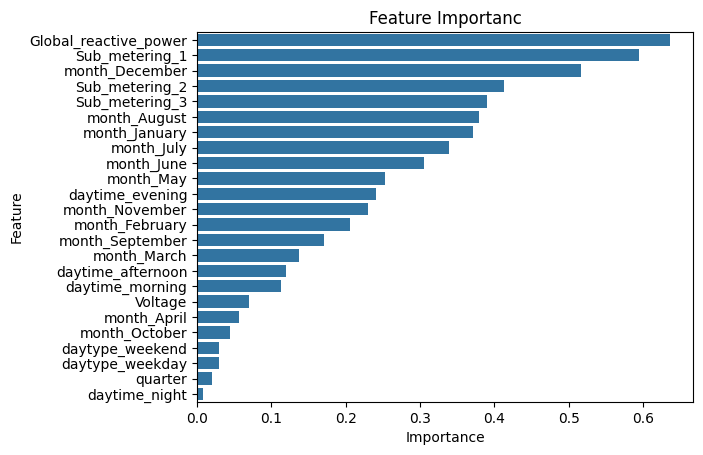

In [386]:
df_test = pd.get_dummies(df_copy)

# Fix memory error
sample_frac = 0.40
df_sample = df_test.sample(frac=sample_frac, random_state=42)

features = df_sample.drop(columns=["Global_active_power_diff", "Global_active_power"]).columns
X = df_sample[features]
y = df_sample["Global_active_power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("Regression Report: ")
regression_results(y_true=y_test, y_pred=y_pred)

importances = lr_model.coef_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": abs(importances)})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)

sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importanc")
plt.show()


**With the new features we raised the r2 from 67% to 75%**

Regression Report: 
explained_variance:  0.7518
r2:  0.7518
MAE:  0.3681
MSE:  0.2783
                  Feature  Importance
0   Global_reactive_power    0.655896
2          Sub_metering_1    0.597213
11         month_December    0.486576
3          Sub_metering_2    0.413713
13          month_January    0.402500
4          Sub_metering_3    0.389625
10           month_August    0.388339
14             month_July    0.350343
15             month_June    0.296583
17              month_May    0.242432
6         daytime_evening    0.239372
12         month_February    0.236314
18         month_November    0.200112
20        month_September    0.181060
16            month_March    0.167186
5       daytime_afternoon    0.119813
7         daytime_morning    0.112930
1                 Voltage    0.069338
9             month_April    0.047522
19          month_October    0.013592
8           daytime_night    0.006629


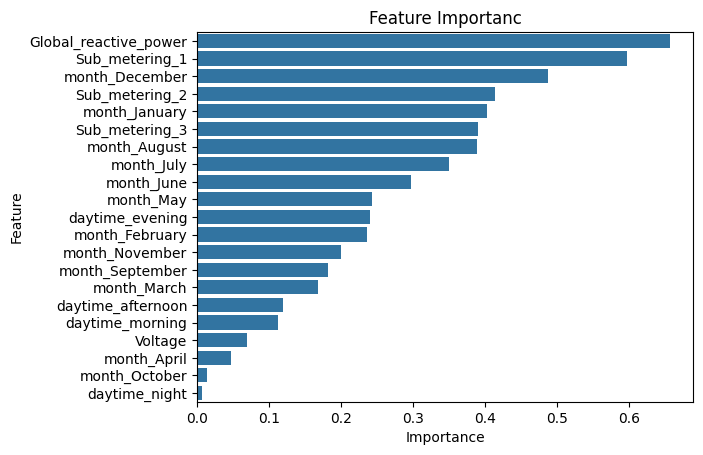

In [387]:
df_test = pd.get_dummies(df_copy)

# Fix memory error
sample_frac = 0.40
df_sample = df_test.sample(frac=sample_frac, random_state=42)

# Target + unimportant features
features = df_sample.drop(columns=["Global_active_power_diff", "Global_active_power", "quarter", "daytype_weekend", "daytype_weekday"]).columns
X = df_sample[features]
y = df_sample["Global_active_power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("Regression Report: ")
regression_results(y_true=y_test, y_pred=y_pred)

importances = lr_model.coef_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": abs(importances)})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)

sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importanc")
plt.show()


Total features removed without making difference in performance

#### Create Rolling and Lag features based on periods importance above

In [25]:
# - rolling 60 mins mean
# - rolling A day mean
# - rolling 7 days std

df_copy["60_min_roll"] = df_copy['Global_active_power'].rolling('60min').mean()
df_copy["day_roll"] = df_copy['Global_active_power'].rolling('1440min').mean()
df_copy["7_days_roll"] = df_copy['Global_active_power'].rolling('7d').std()
df_copy.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:36:00                5.224               0.390690   232.99   
2006-12-16 17:37:00                5.268               0.335043   232.91   
2006-12-16 17:38:00                4.054               0.352064   235.24   
2006-12-16 17:39:00                3.384               0.248421   237.14   
2006-12-16 17:40:00                3.270               0.141500   236.73   

                     Sub_metering_1  Sub_metering_2  Sub_metering_3  \
dt                                                                    
2006-12-16 17:36:00             0.0        0.693147        2.833213   
2006-12-16 17:37:00             0.0        1.098612        2.890372   
2006-12-16 17:38:00             0.0        0.693147        2.890372   
2006-12-16 17:39:00             0.0        0.000000        2.890372   
2006-12-16 17:40:00             0.0        0.000000        2.890372   

                     Global_active_power_diff    daytime  daytype     month  \
dt                                                                            
2006-12-16 17:36:00                     1.008  afternoon  weekend  December   
2006-12-16 17:37:00                    -0.092  afternoon  weekend  December   
2006-12-16 17:38:00                    -1.320  afternoon  weekend  December   
2006-12-16 17:39:00                    -2.004  afternoon  weekend  December   
2006-12-16 17:40:00                    -0.396  afternoon  weekend  December   

                     quarter  60_min_roll  day_roll  7_days_roll  
dt                                                                
2006-12-16 17:36:00        4     5.224000  5.224000          NaN  
2006-12-16 17:37:00        4     5.246000  5.246000     0.031113  
2006-12-16 17:38:00        4     4.848667  4.848667     0.688553  
2006-12-16 17:39:00        4     4.482500  4.482500     0.923246  
2006-12-16 17:40:00        4     4.240000  4.240000     0.966084

In [26]:
print(df_copy.isnull().sum())
df_copy.dropna(axis=0, inplace=True)

Global_active_power         0
Global_reactive_power       0
Voltage                     0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3              0
Global_active_power_diff    0
daytime                     0
daytype                     0
month                       0
quarter                     0
60_min_roll                 0
day_roll                    0
7_days_roll                 1
dtype: int64


In [27]:
# - lag 1 min
# - lag 1 hour
# - lag 1 day

df_copy["1_min_lag"] = df_copy["Global_active_power"].shift(1)
df_copy["60_min_lag"] = df_copy["Global_active_power"].shift(60)
df_copy["1_day_lag"] = df_copy["Global_active_power"].shift(1440)

df_copy.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:37:00                5.268               0.335043   232.91   
2006-12-16 17:38:00                4.054               0.352064   235.24   
2006-12-16 17:39:00                3.384               0.248421   237.14   
2006-12-16 17:40:00                3.270               0.141500   236.73   
2006-12-16 17:41:00                3.430               0.144966   237.06   

                     Sub_metering_1  Sub_metering_2  Sub_metering_3  \
dt                                                                    
2006-12-16 17:37:00             0.0        1.098612        2.890372   
2006-12-16 17:38:00             0.0        0.693147        2.890372   
2006-12-16 17:39:00             0.0        0.000000        2.890372   
2006-12-16 17:40:00             0.0        0.000000        2.890372   
2006-12-16 17:41:00             0.0        0.000000        2.890372   

                     Global_active_power_diff    daytime  daytype     month  \
dt                                                                            
2006-12-16 17:37:00                    -0.092  afternoon  weekend  December   
2006-12-16 17:38:00                    -1.320  afternoon  weekend  December   
2006-12-16 17:39:00                    -2.004  afternoon  weekend  December   
2006-12-16 17:40:00                    -0.396  afternoon  weekend  December   
2006-12-16 17:41:00                    -0.090  afternoon  weekend  December   

                     quarter  60_min_roll  day_roll  7_days_roll  1_min_lag  \
dt                                                                            
2006-12-16 17:37:00        4     5.246000  5.246000     0.031113        NaN   
2006-12-16 17:38:00        4     4.848667  4.848667     0.688553      5.268   
2006-12-16 17:39:00        4     4.482500  4.482500     0.923246      4.054   
2006-12-16 17:40:00        4     4.240000  4.240000     0.966084      3.384   
2006-12-16 17:41:00        4     4.105000  4.105000     0.925205      3.270   

                     60_min_lag  1_day_lag  
dt                                          
2006-12-16 17:37:00         NaN        NaN  
2006-12-16 17:38:00         NaN        NaN  
2006-12-16 17:39:00         NaN        NaN  
2006-12-16 17:40:00         NaN        NaN  
2006-12-16 17:41:00         NaN        NaN

In [28]:
print(df_copy.isnull().sum())
# fill of previous value instead of dropping
df_copy.fillna(method='bfill', inplace=True)

Global_active_power            0
Global_reactive_power          0
Voltage                        0
Sub_metering_1                 0
Sub_metering_2                 0
Sub_metering_3                 0
Global_active_power_diff       0
daytime                        0
daytype                        0
month                          0
quarter                        0
60_min_roll                    0
day_roll                       0
7_days_roll                    0
1_min_lag                      1
60_min_lag                    60
1_day_lag                   1440
dtype: int64


Regression Report: 
explained_variance:  0.9451
r2:  0.9451
MAE:  0.1139
MSE:  0.0617
                  Feature  Importance
8               1_min_lag    0.815700
0   Global_reactive_power    0.135067
2          Sub_metering_1    0.120726
3          Sub_metering_2    0.074319
18         month_December    0.064393
4          Sub_metering_3    0.059931
20          month_January    0.054122
21             month_July    0.045036
22             month_June    0.043626
17           month_August    0.043108
24              month_May    0.038203
5             60_min_roll    0.034520
19         month_February    0.031904
12        daytime_evening    0.030888
25         month_November    0.025269
27        month_September    0.025164
23            month_March    0.023060
6                day_roll    0.021158
11      daytime_afternoon    0.019268
13        daytime_morning    0.014456
1                 Voltage    0.012753
10              1_day_lag    0.008223
9              60_min_lag    0.004402
16

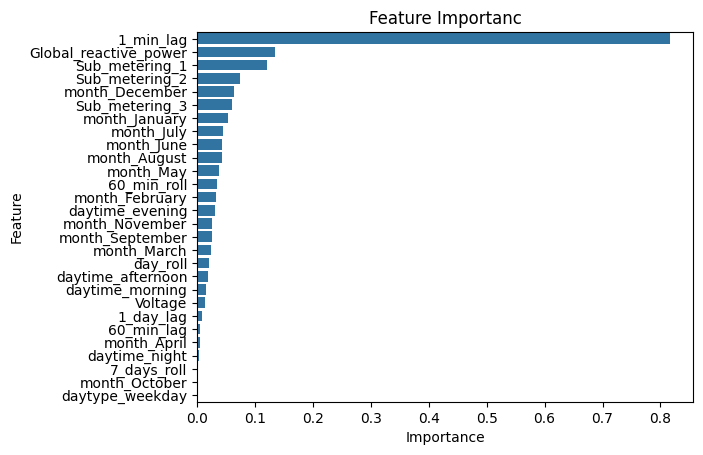

In [392]:
# Check new feature effect and importance

df_test = pd.get_dummies(df_copy)

# Fix memory error
sample_frac = 0.40
df_sample = df_test.sample(frac=sample_frac, random_state=42)

# Target + unimportant features
features = df_sample.drop(columns=["Global_active_power_diff", "Global_active_power", "quarter", "daytype_weekend"]).columns
X = df_sample[features]
y = df_sample["Global_active_power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("Regression Report: ")
regression_results(y_true=y_test, y_pred=y_pred)

importances = lr_model.coef_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": abs(importances)})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)

sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importanc")
plt.show()


**The performance increased significanly from 75% r2 to 94%**

Regression Report: 
explained_variance:  0.9451
r2:  0.9451
MAE:  0.1139
MSE:  0.0617
                  Feature  Importance
7               1_min_lag    0.815658
0   Global_reactive_power    0.135097
2          Sub_metering_1    0.120721
3          Sub_metering_2    0.074324
17         month_December    0.064531
4          Sub_metering_3    0.059949
19          month_January    0.054340
20             month_July    0.045299
21             month_June    0.043527
16           month_August    0.043515
23              month_May    0.039077
5             60_min_roll    0.034519
18         month_February    0.032393
12        daytime_evening    0.030856
24         month_November    0.024979
26        month_September    0.024929
22            month_March    0.023314
6                day_roll    0.021631
11      daytime_afternoon    0.019255
13        daytime_morning    0.014479
1                 Voltage    0.012789
10             is_holiday    0.009781
9               1_day_lag    0.008215
8 

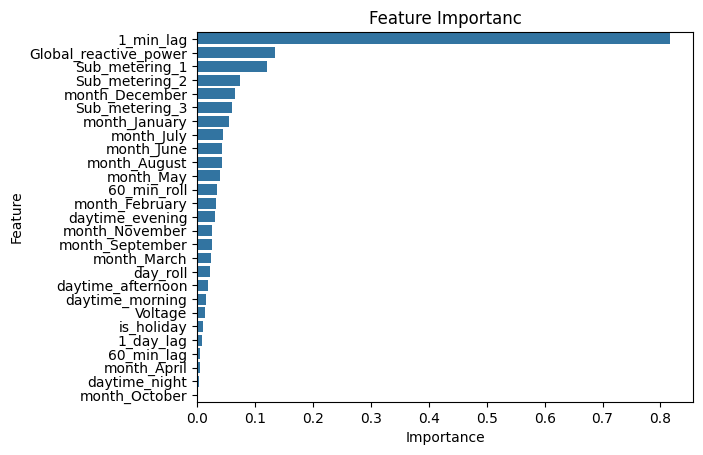

In [635]:
# Check new feature effect and importance

df_test = pd.get_dummies(df_copy)

# Fix memory error
sample_frac = 0.40
df_sample = df_test.sample(frac=sample_frac, random_state=42)

# Target + unimportant features
features = df_sample.drop(columns=["Global_active_power_diff", "Global_active_power", "quarter", "daytype_weekend", "daytype_weekday", "7_days_roll"]).columns
X = df_sample[features]
y = df_sample["Global_active_power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("Regression Report: ")
regression_results(y_true=y_test, y_pred=y_pred)

importances = lr_model.coef_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": abs(importances)})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)

sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importanc")
plt.show()


#### Integrate External Data for(Weater and Holidays)

In [29]:
# Coordinates of Sceaux, France
# Latitude: 48.7833° N
# Longitude: 2.2833° E

In [30]:
# Get start and end date
start_date = df_copy.index.min().date()
end_date = df_copy.index.max().date()

In [31]:
# Add holiday feature
holidays = France(years=range(start_date.year, end_date.year+1))
df_copy['is_holiday'] = df_copy.index.to_series().apply(lambda x: 1 if x.date() in holidays else 0)

df_copy.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:37:00                5.268               0.335043   232.91   
2006-12-16 17:38:00                4.054               0.352064   235.24   
2006-12-16 17:39:00                3.384               0.248421   237.14   
2006-12-16 17:40:00                3.270               0.141500   236.73   
2006-12-16 17:41:00                3.430               0.144966   237.06   

                     Sub_metering_1  Sub_metering_2  Sub_metering_3  \
dt                                                                    
2006-12-16 17:37:00             0.0        1.098612        2.890372   
2006-12-16 17:38:00             0.0        0.693147        2.890372   
2006-12-16 17:39:00             0.0        0.000000        2.890372   
2006-12-16 17:40:00             0.0        0.000000        2.890372   
2006-12-16 17:41:00             0.0        0.000000        2.890372   

                     Global_active_power_diff    daytime  daytype     month  \
dt                                                                            
2006-12-16 17:37:00                    -0.092  afternoon  weekend  December   
2006-12-16 17:38:00                    -1.320  afternoon  weekend  December   
2006-12-16 17:39:00                    -2.004  afternoon  weekend  December   
2006-12-16 17:40:00                    -0.396  afternoon  weekend  December   
2006-12-16 17:41:00                    -0.090  afternoon  weekend  December   

                     quarter  60_min_roll  day_roll  7_days_roll  1_min_lag  \
dt                                                                            
2006-12-16 17:37:00        4     5.246000  5.246000     0.031113      5.268   
2006-12-16 17:38:00        4     4.848667  4.848667     0.688553      5.268   
2006-12-16 17:39:00        4     4.482500  4.482500     0.923246      4.054   
2006-12-16 17:40:00        4     4.240000  4.240000     0.966084      3.384   
2006-12-16 17:41:00        4     4.105000  4.105000     0.925205      3.270   

                     60_min_lag  1_day_lag  is_holiday  
dt                                                      
2006-12-16 17:37:00       5.268      5.268           0  
2006-12-16 17:38:00       5.268      5.268           0  
2006-12-16 17:39:00       5.268      5.268           0  
2006-12-16 17:40:00       5.268      5.268           0  
2006-12-16 17:41:00       5.268      5.268           0

In [32]:
df_copy['is_holiday'].value_counts()

is_holiday
0    1988791
1      60476
Name: count, dtype: int64

In [ ]:
# # add weather feature
# locat = Point(48.78, 2.28)
# weather = Daily(locat, start_date, end_date)

# weather.index = pd.to_datetime(weather.index.date)
# df_copy['date_only'] = df_copy.index.date
# df_copy = df_copy.merge(weather[['tavg', 'prcp', 'wspd']], left_on='date_only', right_index=True, how='left')
# df_copy.drop(columns=['date_only'], inplace=True)

# df_copy[['tavg', 'prcp', 'wspd']] = df_copy[['tavg', 'prcp', 'wspd']]
# df_copy.head()

TypeError: unsupported operand type(s) for -: 'datetime.datetime' and 'datetime.date'

I couldnt get paris weather .csv either due to bad connection in the website of **meteostat**

In [33]:
# Check for missing values
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dt                       0
dtype: int64

Regression Report: 
explained_variance:  0.9451
mean_squared_log_error:  0.0073
r2:  0.9451
MAE:  0.1139
MSE:  0.0617
                  Feature  Importance
7               1_min_lag    0.815658
0   Global_reactive_power    0.135097
2          Sub_metering_1    0.120721
3          Sub_metering_2    0.074324
17         month_December    0.064531
4          Sub_metering_3    0.059949
19          month_January    0.054340
20             month_July    0.045299
21             month_June    0.043527
16           month_August    0.043515
23              month_May    0.039077
5             60_min_roll    0.034519
18         month_February    0.032393
12        daytime_evening    0.030856
24         month_November    0.024979
26        month_September    0.024929
22            month_March    0.023314
6                day_roll    0.021631
11      daytime_afternoon    0.019255
13        daytime_morning    0.014479
1                 Voltage    0.012789
10             is_holiday    0.009781
9       

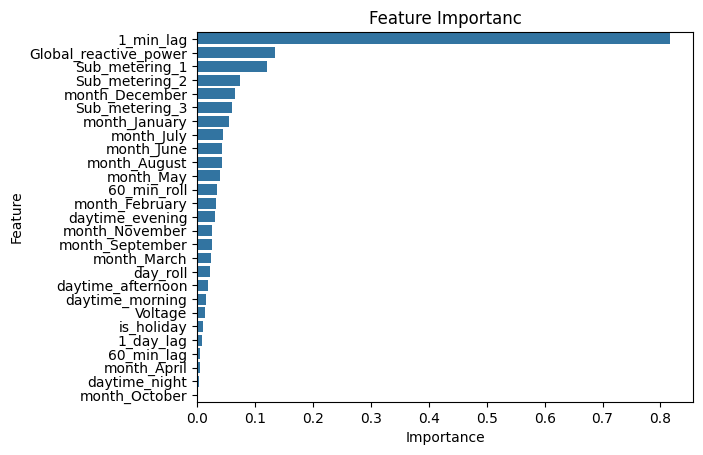

In [57]:
# Check new feature effect and importance

df_test = pd.get_dummies(df_copy)

# Fix memory error
sample_frac = 0.40
df_sample = df_test.sample(frac=sample_frac, random_state=42)

# Target + unimportant features
features = df_sample.drop(columns=["Global_active_power_diff", "Global_active_power", "quarter", "daytype_weekend", "daytype_weekday", "7_days_roll"]).columns
X = df_sample[features]
y = df_sample["Global_active_power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("Regression Report: ")
regression_results(y_true=y_test, y_pred=y_pred)

importances = lr_model.coef_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": abs(importances)})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)

sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importanc")
plt.show()


is_holiday have low importance, weather feature would likely have much higher importance

In [35]:
data_final = pd.get_dummies(df_copy)

In [36]:
data_final.drop(columns=["quarter", "daytype_weekend", "daytype_weekday", "7_days_roll"], inplace=True)

In [37]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049267 entries, 2006-12-16 17:37:00 to 2010-11-26 21:02:00
Data columns (total 29 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Global_active_power       float64
 1   Global_reactive_power     float64
 2   Voltage                   float64
 3   Sub_metering_1            float64
 4   Sub_metering_2            float64
 5   Sub_metering_3            float64
 6   Global_active_power_diff  float64
 7   60_min_roll               float64
 8   day_roll                  float64
 9   1_min_lag                 float64
 10  60_min_lag                float64
 11  1_day_lag                 float64
 12  is_holiday                int64  
 13  daytime_afternoon         bool   
 14  daytime_evening           bool   
 15  daytime_morning           bool   
 16  daytime_night             bool   
 17  month_April               bool   
 18  month_August              bool   
 19  month_December            bool

**Final Dataset for model training**

# Ensemble Model

In [38]:
# Scalling
from sklearn.preprocessing import MinMaxScaler

# Deep learning models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    LSTM,
    Bidirectional,
)

from keras.models import load_model

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Callback functions
from keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint
)

# Importing Scikit-Learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

from xgboost import XGBRegressor
from prophet import Prophet


- LSTM
- XGBOOST

## Pipeline Functions

In [39]:
# # Data Preparing Functions

# def create_window(data, lags=30, horizon=5, delay=0):

#     """
#     This function creates slicing window for time series data
#     to prepare for lstm models.
#     Params:
#     data : data to be prepared
#     lags : #past time steps as input
#     horizon : #future steps to be predicted
#     delay : Gap between input and output"""

#     np_data = np.array(data)
#     N = np_data.shape[0] 
#     d = np_data.shape[1] 



#     k = N - (lags + horizon + delay) + 1 # Number of generated samples

#     in_slice = np.array([range(i, i + lags) for i in range(k)])
#     op_slice = np.array([range(i + lags + delay, i + lags + horizon + delay) for i in range(k)])

    
#     in_data = np_data[in_slice,:]
#     out_data = np_data[op_slice,:]
#     print(f"input data shape: {in_data.shape}")
#     print(f"output data shape: {out_data.shape}")

#     return in_data, out_data


def sequential_split(df, train=0.8, val=0.10):

    """
    Sequential data split considering temporal aspect and ensuring no leakage
    train : ratio of training data
    val : ratio of validation data and ratio of testing data"""

    N = len(df)
    train_end = int(N * train)
    val_end = int(N * (train + val))

    train = df.iloc[:train_end]
    val = df.iloc[train_end:val_end]
    test = df.iloc[val_end:]

    features = data_final.drop(columns=["Global_active_power", "Global_active_power_diff"]).columns
    target = "Global_active_power"

    X_train = train[features]
    y_train = train[target]

    X_val = val[features]
    y_val = val[target]

    X_test = test[features]
    y_test = test[target]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [40]:
# Model Functions

def lstm_model(input_shape):
    model = Sequential()
    
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(Bidirectional(LSTM(32, activation='relu')))
    model.add(Dropout(0.4))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse', metrics=['mse', 'r2_score'])
    return model



def xgboost():

    return XGBRegressor(n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist', 
    n_jobs=-1)


def linear_regression():
    return LinearRegression()

In [47]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))

In [41]:
def train(data, model, model_type, X_train, y_train, X_val, y_val, X_test, y_test, epochs=None, batch_size=None,
          prophet_data=None, regressors=None):

    if model_type == "LSTM":
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()

        # Fit scaler on train only, transform val and test -> to avoid leakage
        X_train_scaled = scaler_X.fit_transform(X_train)
        X_val_scaled = scaler_X.transform(X_val)
        X_test_scaled = scaler_X.transform(X_test)

        y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
        y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))
        y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

        X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1]) # (#samples, n_steps, #features)
        X_val_scaled = X_val_scaled.reshape(X_val_scaled.shape[0], 1, X_val_scaled.shape[1])
        X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

        early_stopping = EarlyStopping(monitor='val_loss', patience=10)
        history = model.fit(
            X_train_scaled, y_train_scaled,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val_scaled, y_val_scaled),
            callbacks=[early_stopping],
            verbose=1
        )

        y_pred_scaled = model.predict(X_test_scaled)
        y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)


    # Evaluation
    regression_results(y_test, y_pred)

    # Prediction vs Actual Plot
    plt.figure(figsize=(22, 8))
    sample = 5000
    plt.plot(y_test.reset_index(drop=True)[:sample], label='Actual', color='#1f77b4', linewidth=0.7)
    plt.plot(y_pred[:sample], label='Predicted', color='#ff7f0e', linewidth=0.7)
    plt.legend()
    plt.title(f"Prediction vs Actual Plot - {model_type}")
    plt.xlabel('Time Steps')
    plt.ylabel('Global Active Power (kW)')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

## Check each Model's Performance Separately

In [42]:
# train, val, test split
X_train, y_train, X_val, y_val, X_test, y_test = sequential_split(data_final)

Epoch 1/5
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 74s 5ms/step - loss: 8.0085e-04 - mse: 8.0085e-04 - r2_score: 0.9182 - val_loss: 2.7375e-04 - val_mse: 2.7375e-04 - val_r2_score: 0.9606
Epoch 2/5
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - loss: 6.5813e-04 - mse: 6.5813e-04 - r2_score: 0.9328 - val_loss: 2.7933e-04 - val_mse: 2.7933e-04 - val_r2_score: 0.9598
Epoch 3/5
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 81s 6ms/step - loss: 6.3992e-04 - mse: 6.3992e-04 - r2_score: 0.9346 - val_loss: 2.3029e-04 - val_mse: 2.3029e-04 - val_r2_score: 0.9668
Epoch 4/5
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 92s 7ms/step - loss: 6.3077e-04 - mse: 6.3077e-04 - r2_score: 0.9356 - val_loss: 2.3353e-04 - val_mse: 2.3353e-04 - val_r2_score: 0.9664
Epoch 5/5
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 102s 8ms/step - loss: 6.2356e-04 - mse: 6.2356e-04 - r2_score: 0.9363 - val_loss: 2.2611e-04 - val_mse: 2.2611e-04 - val_r2_score: 0.9674
6404/6404 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step
explained_variance:  0.9658
r2:  0.9657
MAE:  0.0761
MS

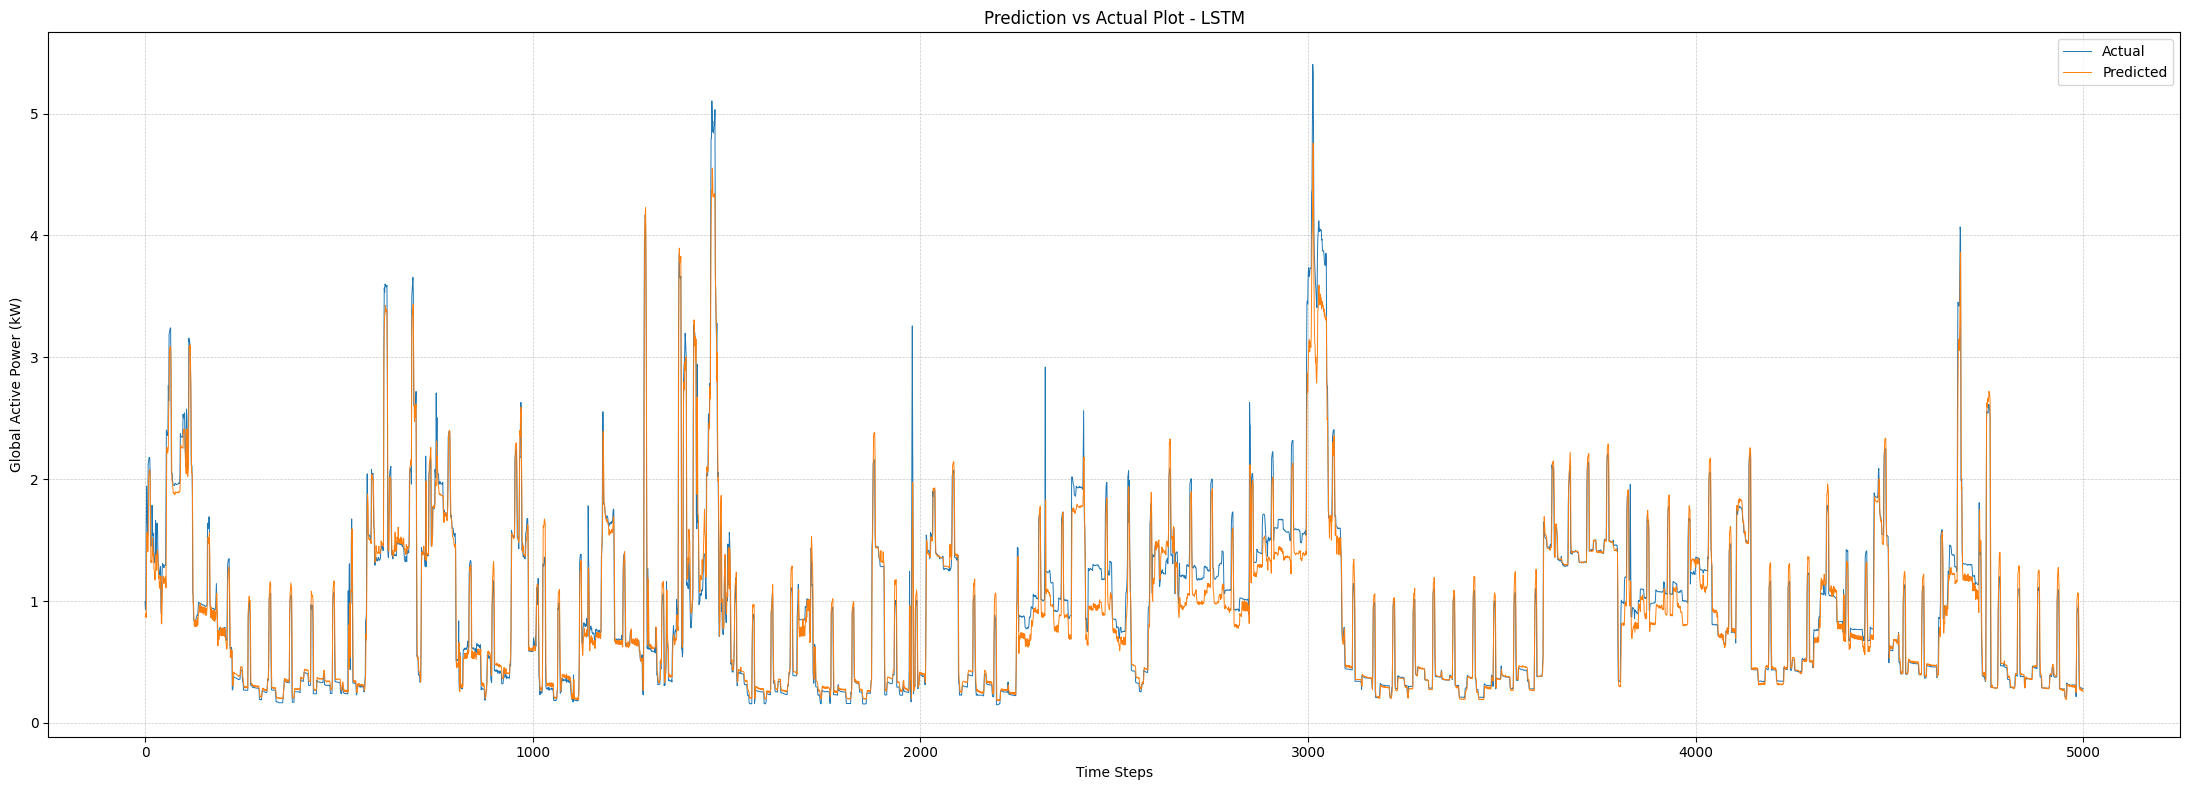

In [646]:
# LSTM
lstm = lstm_model(input_shape=(1, X_train.shape[1])) 
train(data=data_final, model=lstm, model_type="LSTM", epochs=5, batch_size=128,
      X_train=X_train, y_train=y_train,
      X_val=X_val, y_val=y_val,
      X_test=X_test, y_test=y_test)

explained_variance:  0.9686
r2:  0.9686
MAE:  0.0632
MSE:  0.0233


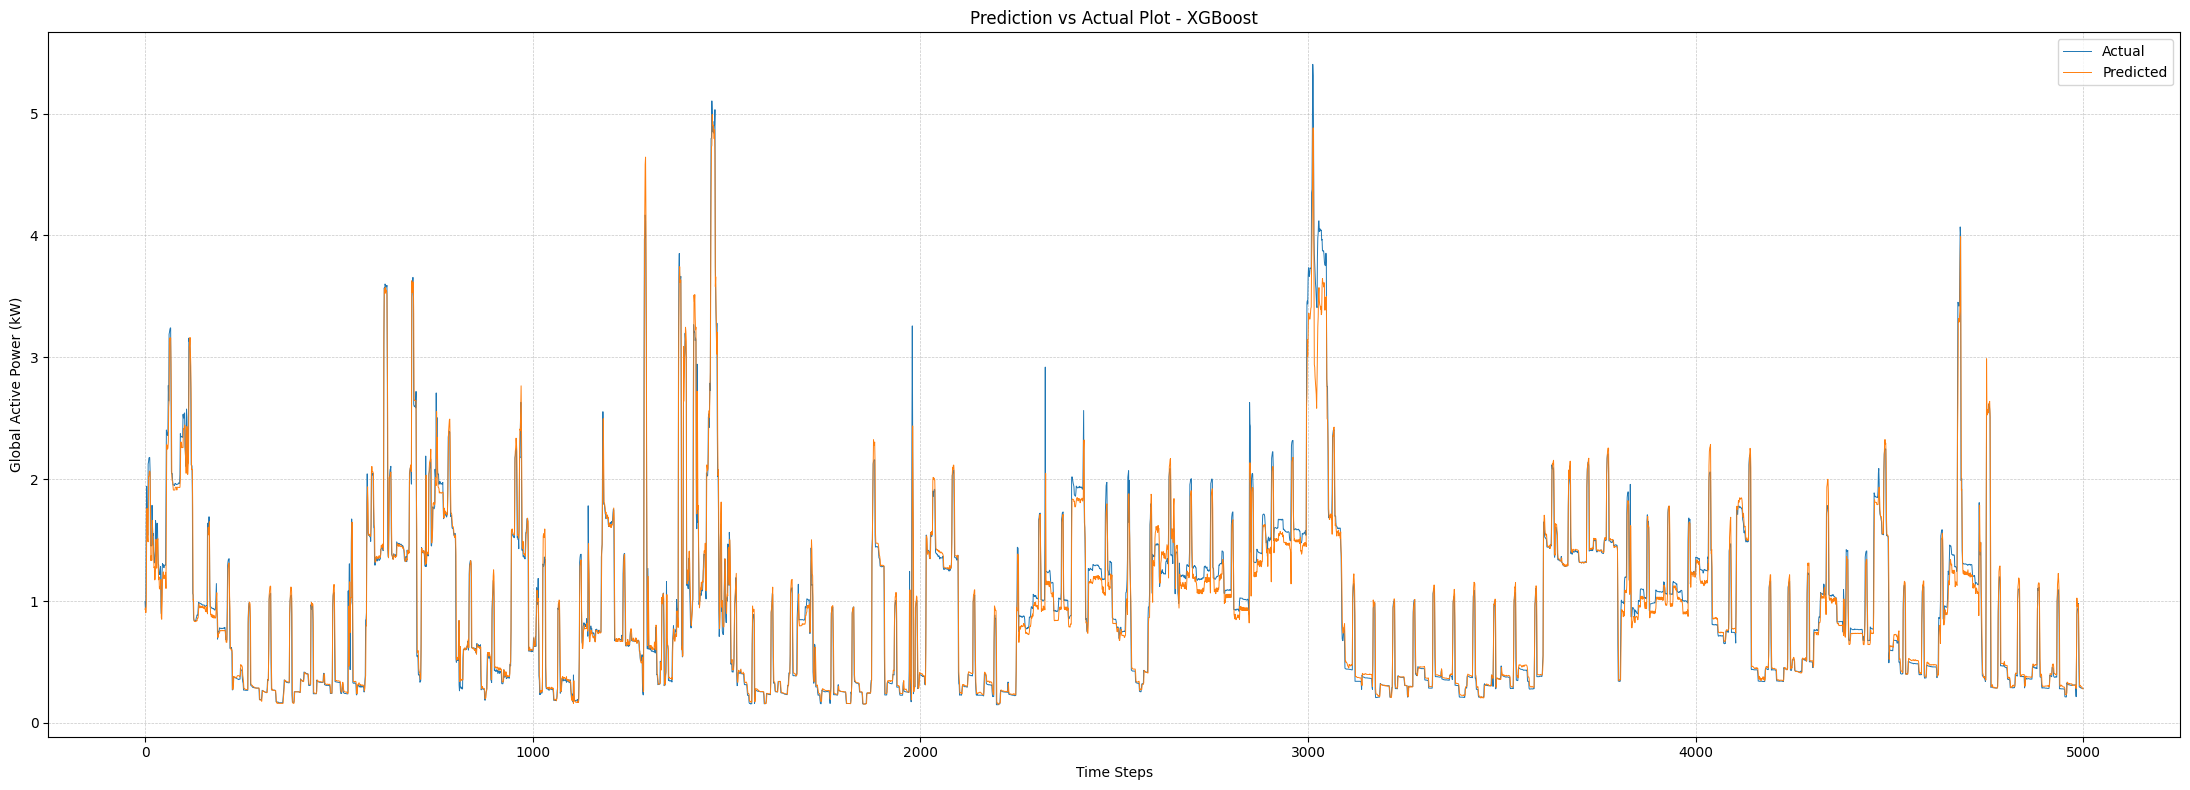

In [633]:
# XGBoost
xgboost = xgboost()
train(data=data_final, model=xgboost, model_type="XGBoost", epochs=None, batch_size=None,
      X_train=X_train, y_train=y_train, X_val=None, y_val=None, X_test=X_test, y_test=y_test)

explained_variance:  0.9458
r2:  0.9458
MAE:  0.0996
MSE:  0.0403


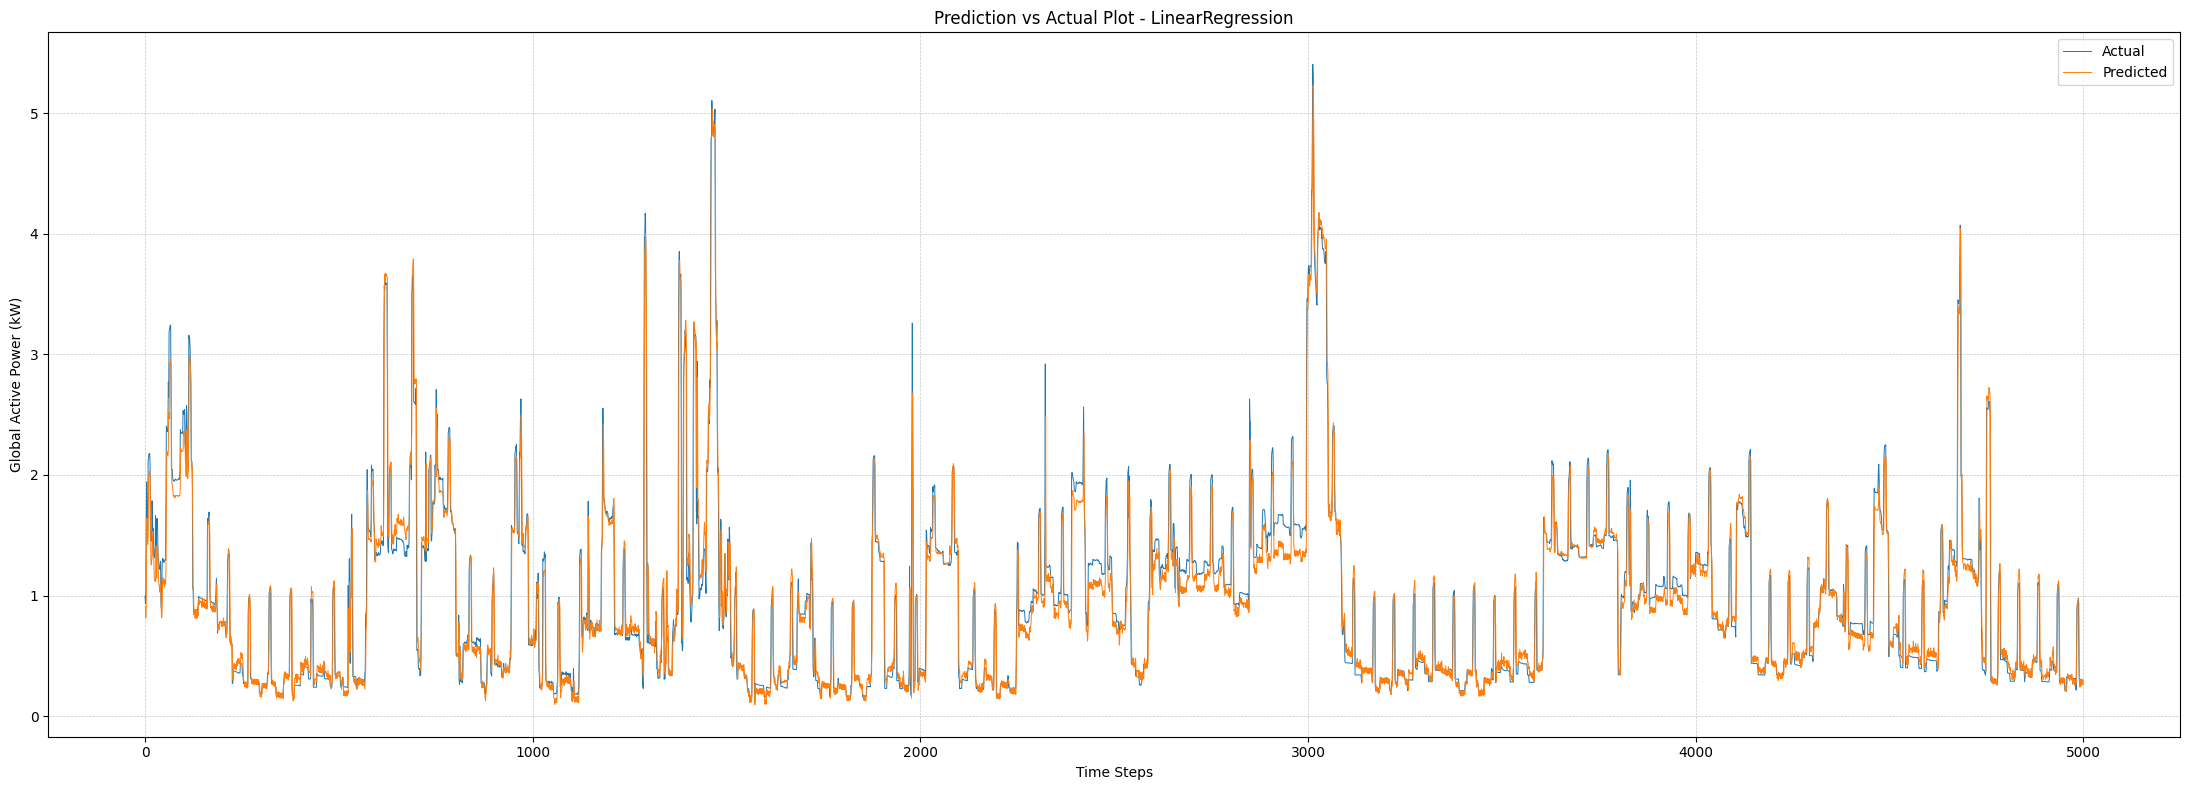

In [681]:
lr = linear_regression()
train(data=data_final, model=lr, model_type="LinearRegression",
      X_train=X_train, y_train=y_train,
      X_val=X_val, y_val=y_val,
      X_test=X_test, y_test=y_test)


#### Important Notes

With over 2 million time steps and many features, using sliding windows for sequence modeling caused big memory issues due to large tensor. I faced repeated MemoryErrors during tests due to my limited resource PC.

To solve this, I engineered lag-based and rolling statistical features that capture temporal patterns. This approach struck a good balance between accuracy and efficiency.

## Ensemble

In [43]:
# Functions
def train(data, model, model_type, X_train, y_train, X_val, y_val, X_test, y_test, epochs=None, batch_size=None):

    if model_type == "LSTM":
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()

        X_train_scaled = scaler_X.fit_transform(X_train)
        X_val_scaled = scaler_X.transform(X_val)
        X_test_scaled = scaler_X.transform(X_test)

        y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
        y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))
        y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

        X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
        X_val_scaled = X_val_scaled.reshape(X_val_scaled.shape[0], 1, X_val_scaled.shape[1])
        X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

        early_stopping = EarlyStopping(monitor='val_loss', patience=10)
        history = model.fit(X_train_scaled, y_train_scaled,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(X_val_scaled, y_val_scaled),
                            callbacks=[early_stopping],
                            verbose=1)

        y_pred_scaled = model.predict(X_test_scaled)
        y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_type} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R2: {r2:.4f}")

    return y_pred, mae

# Function to get each model's weight 
def weighted_ensemble(mae_dict, predictions_dict):
    total_inv_mae = sum(1.0 / mae for mae in mae_dict.values())
    weights = {model: (1.0 / mae) / total_inv_mae for model, mae in mae_dict.items()}

    print(f"Ensemble Weights: {weights}")

    ensemble_pred = sum(predictions_dict[model] * weight for model, weight in weights.items())
    return ensemble_pred


In [44]:
# LSTM
lstm = lstm_model(input_shape=(1, X_train.shape[1]))
y_pred_lstm, mae_lstm = train(data_final, lstm, "LSTM", X_train, y_train, X_val, y_val, X_test, y_test, epochs=5, batch_size=128)

# XGBoost
xgb = xgboost()
y_pred_xgb, mae_xgb = train(data_final, xgb, "XGBoost", X_train, y_train, X_val, y_val, X_test, y_test)

# Linear Regression
lr = linear_regression()
y_pred_lr, mae_lr = train(data_final, lr, "Linear Regression", X_train, y_train, X_val, y_val, X_test, y_test)

Epoch 1/5
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 89s 6ms/step - loss: 7.8479e-04 - mse: 7.8479e-04 - r2_score: 0.9199 - val_loss: 2.6065e-04 - val_mse: 2.6065e-04 - val_r2_score: 0.9624
Epoch 2/5
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 93s 7ms/step - loss: 6.5060e-04 - mse: 6.5060e-04 - r2_score: 0.9336 - val_loss: 2.8529e-04 - val_mse: 2.8529e-04 - val_r2_score: 0.9589
Epoch 3/5
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 157s 12ms/step - loss: 6.3262e-04 - mse: 6.3262e-04 - r2_score: 0.9354 - val_loss: 2.3689e-04 - val_mse: 2.3689e-04 - val_r2_score: 0.9659
Epoch 4/5
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 175s 14ms/step - loss: 6.2455e-04 - mse: 6.2455e-04 - r2_score: 0.9362 - val_loss: 2.5411e-04 - val_mse: 2.5411e-04 - val_r2_score: 0.9634
Epoch 5/5
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 200s 16ms/step - loss: 6.1694e-04 - mse: 6.1694e-04 - r2_score: 0.9370 - val_loss: 2.3403e-04 - val_mse: 2.3403e-04 - val_r2_score: 0.9663
6404/6404 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step
LSTM Performance:
MAE: 0.0872
MSE: 0.0265
R2: 0.96

Ensemble Weights: {'LSTM': 0.30783467253936436, 'XGBoost': 0.42208413881785545, 'LinearRegression': 0.27008118864278025}
explained_variance:  0.9668
mean_squared_log_error:  0.0039
r2:  0.9667
MAE:  0.0721
MSE:  0.0248


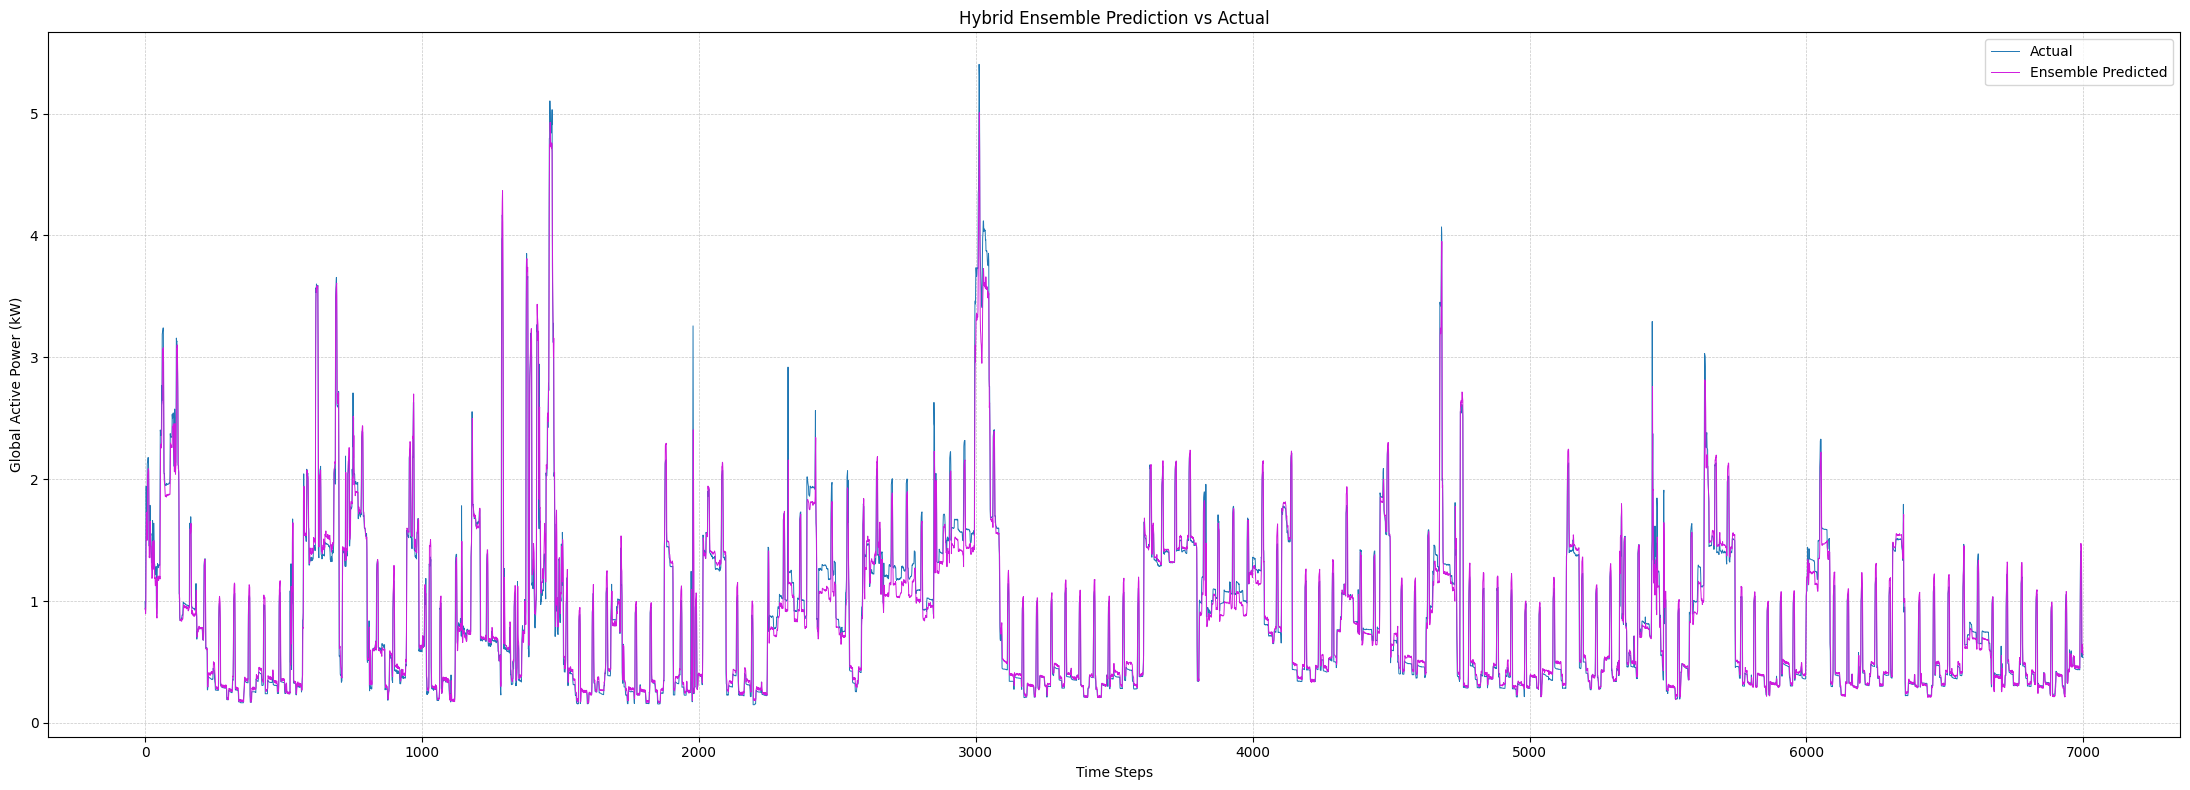

In [48]:
# Ensemble weights
mae_dict = {'LSTM': mae_lstm, 'XGBoost': mae_xgb, 'LinearRegression': mae_lr}
predictions_dict = {'LSTM': y_pred_lstm, 'XGBoost': y_pred_xgb, 'LinearRegression': y_pred_lr}

ensemble_pred = weighted_ensemble(mae_dict, predictions_dict)

# Evaluate 
regression_results(y_test, ensemble_pred)

# Plot Prediction vs Actual
plt.figure(figsize=(22, 8))
sample = 7000
plt.plot(y_test.reset_index(drop=True)[:sample], label='Actual', color='#1f77b4', linewidth=0.7)
plt.plot(ensemble_pred[:sample], label='Ensemble Predicted', color="#d019dd", linewidth=0.7)
plt.legend()
plt.title("Hybrid Ensemble Prediction vs Actual")
plt.xlabel('Time Steps')
plt.ylabel('Global Active Power (kW)')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# Uncertainty Check

PICP (80% Interval): 80.00%
MPIW: 0.1617


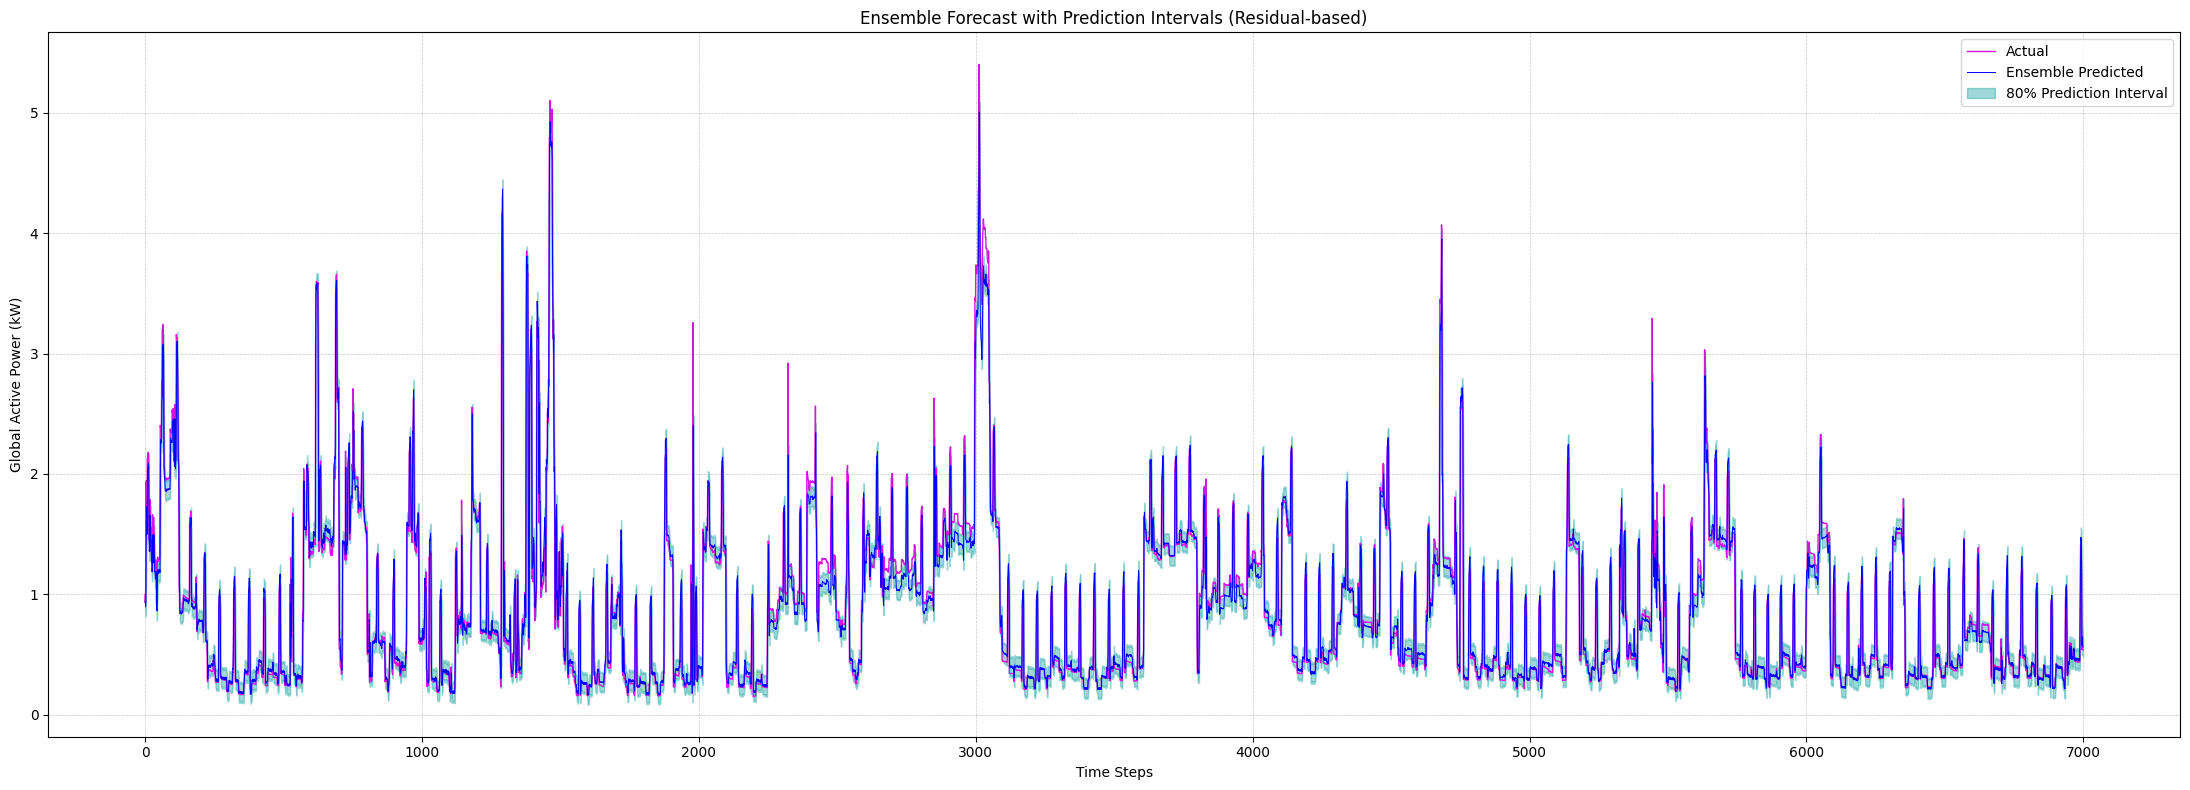

In [56]:
residuals = y_test.values - ensemble_pred
lower_quantile = np.percentile(residuals, 10)
upper_quantile = np.percentile(residuals, 90)

# Error bars
lower_bound = ensemble_pred + lower_quantile
upper_bound = ensemble_pred + upper_quantile

# Percentage of true values inside the interval
picp = np.mean((y_test >= lower_bound) & (y_test <= upper_bound))
print(f"PICP (80% Interval): {picp * 100:.2f}%")

# Mean Prediction Interval Width
mpiw = np.mean(upper_bound - lower_bound)
print(f"MPIW: {mpiw:.4f}")


plt.figure(figsize=(22, 8))
sample = 7000
plt.plot(y_test.reset_index(drop=True)[:sample], label='Actual', color='#d019dd', linewidth=1)
plt.plot(ensemble_pred[:sample], label='Ensemble Predicted', color='blue', linewidth=0.7)
plt.fill_between(range(sample), lower_bound[:sample], upper_bound[:sample], color="#119f9f", alpha=0.4, label='80% Prediction Interval')
plt.legend()
plt.title("Ensemble Forecast with Prediction Intervals (Residual-based)")
plt.xlabel('Time Steps')
plt.ylabel('Global Active Power (kW)')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()
